In [1]:
# Importing Libraries

import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from datetime import datetime
import datetime as dt
import yfinance as yf
from pandas.tseries.frequencies import to_offset
import pandas_datareader #pip install pandas-datareader
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import pandas_datareader as web
from tabulate import tabulate
plt.style.use('fivethirtyeight')

#### <u>Preliminary Steps - Data loading<u>

In [2]:
# Create a dictionary to assign the symbols of these 12 stocks to be analysed along with S&P500 index

companies_dict = {
    'American Airlines' : 'AAL',
    'Apple Inc Ltd'     :'AAPL',
    'Alaska Air'        : 'ALK',
    'Amazon'            : 'AMZN',
    'Bausch Health'     : 'BHC',
    'Credit Suisse'     : 'CS',
    'Deutsche Bank'     : 'DB',
    'Google'            : 'GOOG',
    'Goldman Sachs'     : 'GS',
    'Hawaiian Holdings' : 'HA',
    'Johnson & Johnson' : 'JNJ',
    'Merck & Co'        :'MRK',
    'S&P 500 Index'     :'%5EGSPC'    
}

In [3]:
# Extraction of data - selecting the date range
data_source = 'yahoo'
start_date = '2010-01-01'
end_date = '2021-08-31'
end=datetime.datetime(2021,8,31)
df = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

In [4]:
# Ensure data is correctly loaded in a single dataframe with distinguished labels for each stock and the industry

df.head()

Attributes Adj Close                                                        \
Symbols          AAL      AAPL       ALK        AMZN        BHC         CS   
Date                                                                         
2009-12-31  4.562869  6.462008  7.769618  134.520004  13.204712  32.265209   
2010-01-04  4.496877  6.562589  7.839310  133.899994  13.885757  34.122631   
2010-01-05  5.005957  6.573934  8.268707  134.690002  14.074936  34.404850   
2010-01-06  4.798554  6.469369  8.194516  132.250000  14.160067  33.925724   
2010-01-07  4.939965  6.457409  8.151806  130.000000  13.999264  35.297459   

Attributes                                               ...      Volume  \
Symbols            DB        GOOG          GS        HA  ...        AMZN   
Date                                                     ...               
2009-12-31  57.167484  308.832428  141.783188  6.744578  ...   4523000.0   
2010-01-04  59.037861  312.204773  145.343704  6.840928  ...   7599900.0   
2010-01-05  60.166542  310.829926  147.913345  6.946915  ...   8851900.0   
2010-01-06  59.126541  302.994293  146.334595  6.686767  ...   7178800.0   
2010-01-07  59.795689  295.940735  149.198151  6.946915  ...  11030200.0   

Attributes                                                                   \
Symbols           BHC        CS        DB        GOOG          GS        HA   
Date                                                                          
2009-12-31   385400.0  203981.0  292182.0   2448744.0   6401800.0  257600.0   
2010-01-04  1938500.0  734208.0  469504.0   3927065.0   9135000.0  290800.0   
2010-01-05  1121100.0  447795.0  503354.0   6031925.0  11659400.0  783400.0   
2010-01-06   967500.0  751206.0  495075.0   7987226.0   7381100.0  670100.0   
2010-01-07  1279900.0  833741.0  700169.0  12876685.0   8727400.0  429200.0   

Attributes                                        
Symbols            JNJ         MRK       %5EGSPC  
Date                                              
2009-12-31   6962300.0   7403072.0  2.076990e+09  
2010-01-04   9506200.0  14563532.0  3.991400e+09  
2010-01-05  10673100.0  15452550.0  2.491020e+09  
2010-01-06  13171500.0  15971415.0  4.972660e+09  
2010-01-07  10901600.0  12488597.0  5.270680e+09  

[5 rows x 78 columns]

In [5]:
# Missing values are correctly identified and treated accordingly, i.e., no missing value is present in the dataset.

print('No missing data') if sum(df.isna().sum()) == 0 else df.isna().sum()

No missing data


In [6]:
stock_open = np.array(df['Open']).T #stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T #stock_close is numpy array of transpose of df['Close']

In [7]:
# Movements is the difference of opening and closing prices of a particular  day. Positive movement implies you can buy the stock while negative movement implies you can sell the stock

movements = stock_close - stock_open

In [8]:
# Sum of differences of closing and opening prices of all days

sum_of_movement = np.sum(movements,1)

In [9]:
# Check for movements

for i in range (len(companies_dict)):
    print('company:{}, Change{}'.format(df['High'].columns[i], sum_of_movement[i]))

company:AAL, Change-65.1800000667572
company:AAPL, Change48.22945213317871
company:ALK, Change-40.22997570037842
company:AMZN, Change-765.4935684204102
company:BHC, Change-85.3798475265503
company:CS, Change-22.217411994934082
company:DB, Change-36.6841197013855
company:GOOG, Change1341.3438110351562
company:GS, Change62.22997283935547
company:HA, Change-41.02003788948059
company:JNJ, Change44.26997756958008
company:MRK, Change-19.786455154418945
company:%5EGSPC, Change1703.6218872070312


#### <u>Creating Sub-plots to visualize the stocks movement<u>

[]

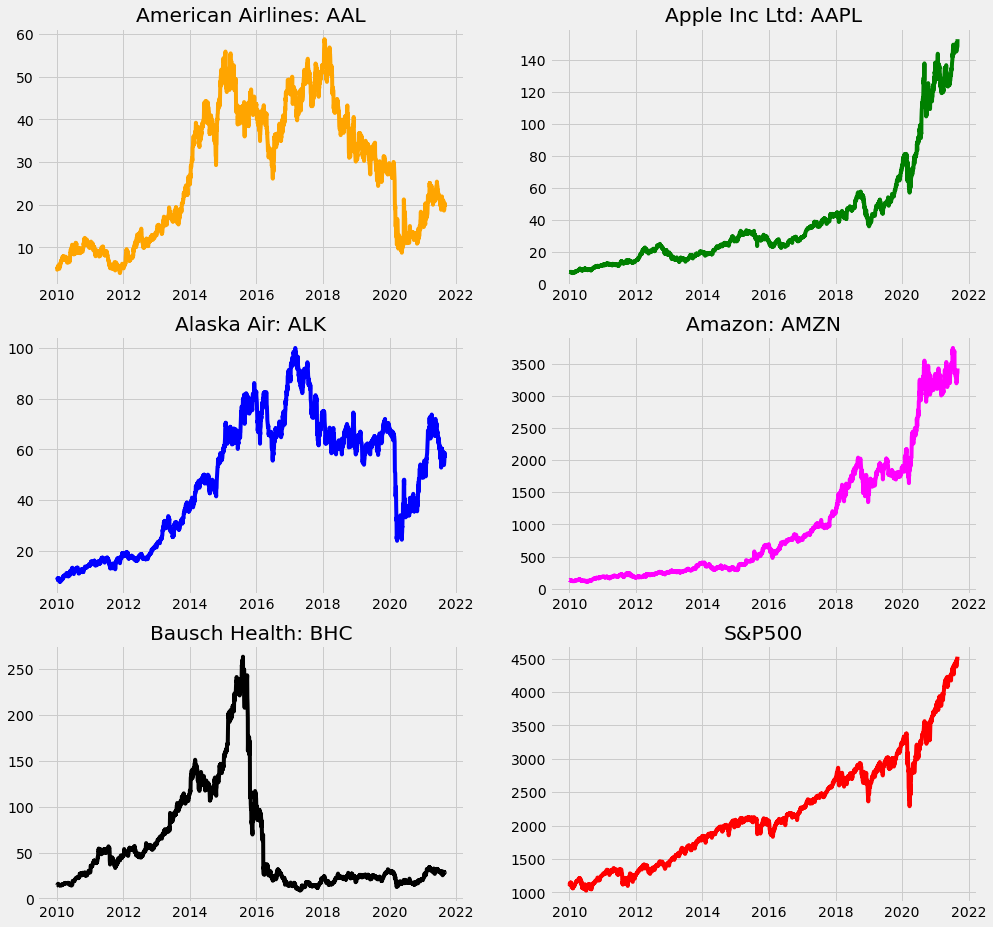

In [10]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(15,15))

ax1.plot(df['Open']['AAL'], color = "orange")
ax1.set_title("American Airlines: AAL")

ax2.plot(df['Open']['AAPL'], color = "green")
ax2.set_title("Apple Inc Ltd: AAPL")

ax3.plot(df['Open']['ALK'], color = "blue")
ax3.set_title("Alaska Air: ALK")

ax4.plot(df['Open']['AMZN'], color = "magenta")
ax4.set_title("Amazon: AMZN")

ax5.plot(df['Open']['BHC'], color = "black")
ax5.set_title("Bausch Health: BHC")

ax6.plot(df['Open']['%5EGSPC'], color = "red")
ax6.set_title("S&P500")

plt.plot()

[]

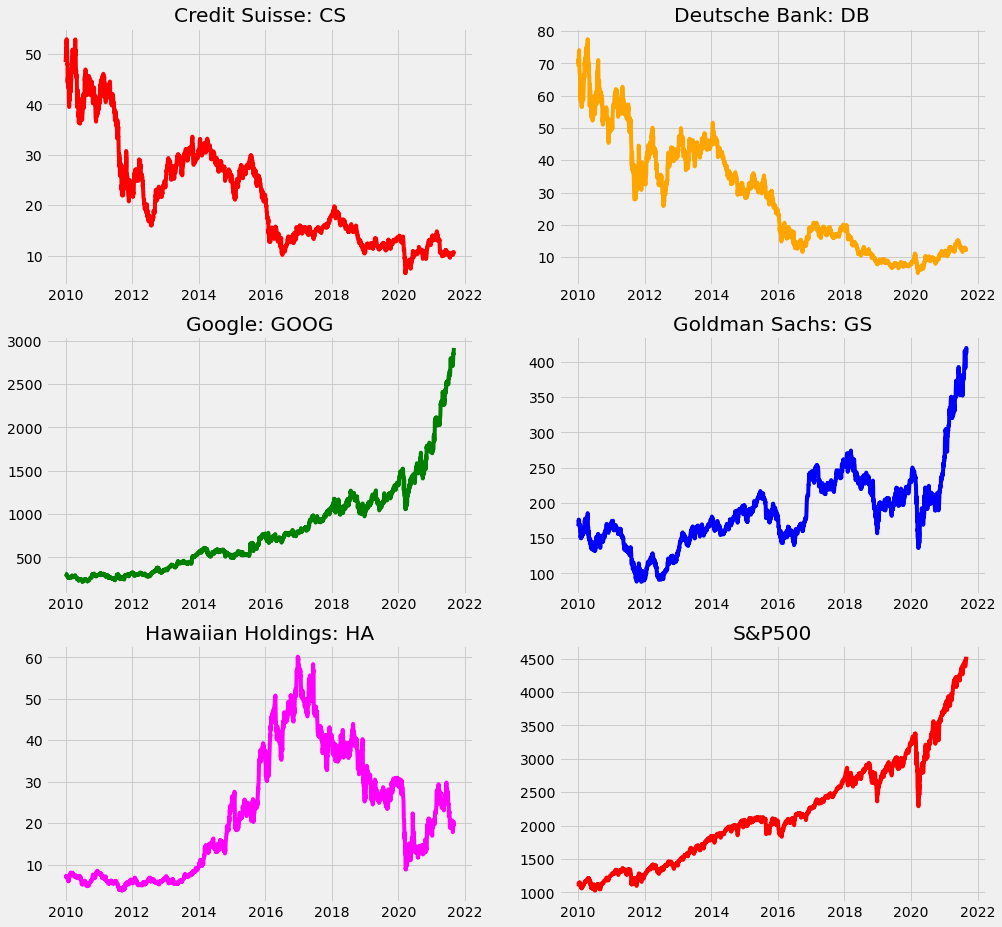

In [11]:
fig,((ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(3,2,figsize=(15,15))

ax7.plot(df['Open']['CS'], color = "red")
ax7.set_title("Credit Suisse: CS")

ax8.plot(df['Open']['DB'], color = "orange")
ax8.set_title("Deutsche Bank: DB")

ax9.plot(df['Open']['GOOG'], color = "green")
ax9.set_title("Google: GOOG")

ax10.plot(df['Open']['GS'], color = "blue")
ax10.set_title("Goldman Sachs: GS")

ax11.plot(df['Open']['HA'], color = "magenta")
ax11.set_title("Hawaiian Holdings: HA")

ax12.plot(df['Open']['%5EGSPC'], color = "red")
ax12.set_title("S&P500")

plt.plot()

[]

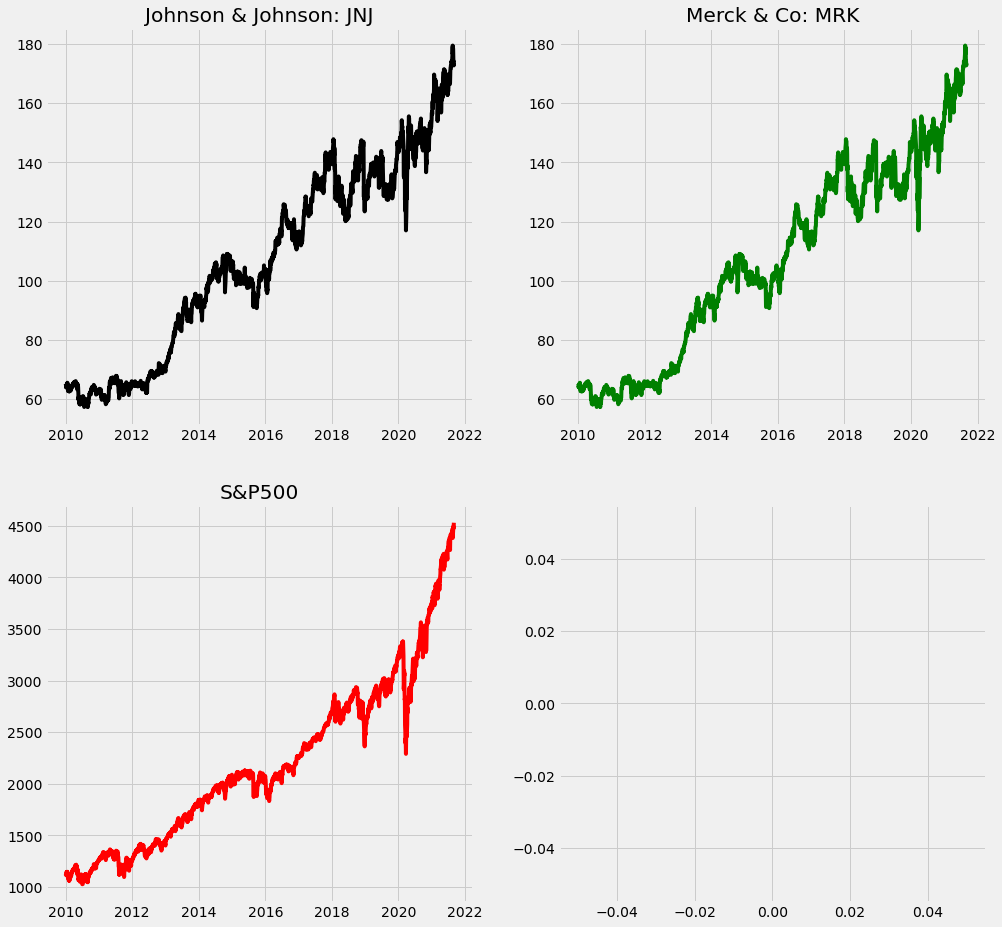

In [12]:
fig,((ax13,ax14),(ax15,ax16)) = plt.subplots(2,2,figsize=(15,15))

ax13.plot(df['Open']['JNJ'], color = "black")
ax13.set_title("Johnson & Johnson: JNJ")

ax14.plot(df['Open']['JNJ'], color = "green")
ax14.set_title("Merck & Co: MRK")

ax15.plot(df['Open']['%5EGSPC'], color = "red")
ax15.set_title("S&P500")

plt.plot()

Index is in uptrend and the stocks that are in:

1> Uptrend: Apple, Amazon, Google, Goldman Sachs, J&J, Merck & Co

2> No trend / sideways : Hawaiian Holdings

3> Downtrend: American Airlines, Alaska Air, Bausch Health, Credit Suisse, Deutsche Bank

<u>Observation</u>: 
Stocks in down trend are to be avoided. We will only focus on stocks that are in an Uptrend

## Heatmap

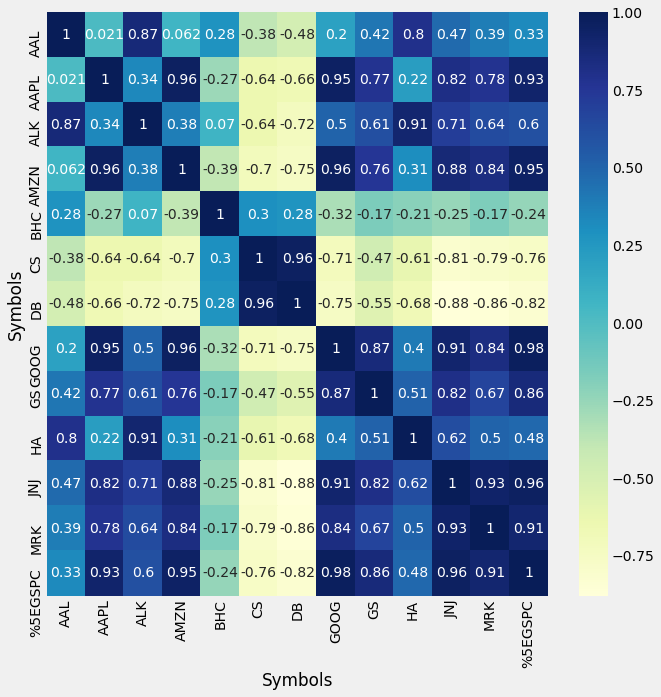

In [13]:
# Let's check the correlation coefficients based on Closing price to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df['Close'].corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

Index is in an uptrend and these stocks have the following correlation:

1> Strong Positive Correlation (0.6 to 1): Apple, Amazon, Google, Goldman Sachs, J&J, Merck & Co

2> Weak Positive Correlation (0 to 0.6): American Airlines, Alaska Air, Hawaiian Holdings

3> Negative Correlation (0 to -1): Bausch Health, Credit Suisse, Deutsche Bank

<u>Observation</u>: 
Stocks with positive correlation are recommended during the advancing phase of market cycle / index, whilst stocks with negative correlation should be avoid during this phase.

## <u>Returns generated (Stock Alpha)</u>


Let us now calculate the returns that have been generated by these stocks based on the below formula

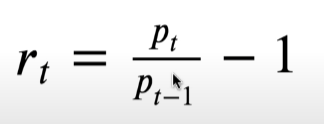

In [14]:
# Create empty DataFrame called 'returns'

returns=pd.DataFrame()

In [15]:
df.Close['AAL']

Date
2009-12-31     4.840000
2010-01-04     4.770000
2010-01-05     5.310000
2010-01-06     5.090000
2010-01-07     5.240000
                ...    
2021-08-25    20.150000
2021-08-26    19.900000
2021-08-27    20.219999
2021-08-30    19.510000
2021-08-31    19.940001
Name: AAL, Length: 2937, dtype: float64

In [16]:
tickers = ['AAL','AAPL','ALK','AMZN','BHC','CS','DB','GOOG','GS','HA','JNJ', 'MRK', '%5EGSPC']

In [17]:
# Create a new concatenated dataframe (i.e merging) with all the information from individual stocks

bank_stocks=pd.concat([df.Close['AAL'], df.Close['AAPL'], df.Close['ALK'], df.Close['AMZN'], df.Close['BHC'], df.Close['CS'], df.Close['DB'],df.Close['GOOG'], df.Close['GS'],df.Close['HA'], df.Close['JNJ'], df.Close['MRK'], df.Close['%5EGSPC']],keys=tickers,axis=1)

In [18]:
bank_stocks.columns

Index(['AAL', 'AAPL', 'ALK', 'AMZN', 'BHC', 'CS', 'DB', 'GOOG', 'GS', 'HA',
       'JNJ', 'MRK', '%5EGSPC'],
      dtype='object')

In [19]:
# Calculation of percentage change
for tick in tickers:
    returns[tick+'return']= bank_stocks[tick].pct_change()

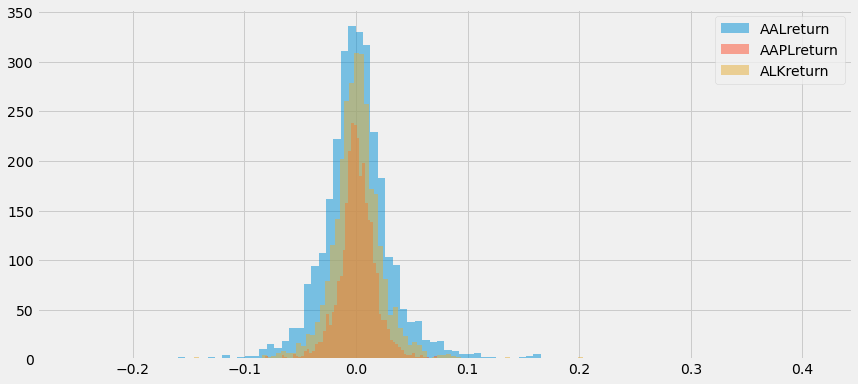

In [20]:
returns['AALreturn'].hist(bins=100, label='AALreturn', alpha=0.5, figsize = (13,6))
returns['AAPLreturn'].hist(bins=100, label='AAPLreturn', alpha=0.5)
returns['ALKreturn'].hist(bins=100, label='ALKreturn', alpha=0.5)
plt.legend()

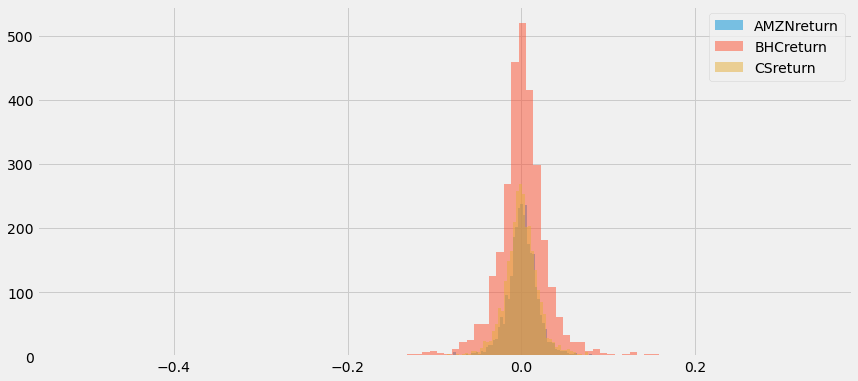

In [21]:
returns['AMZNreturn'].hist(bins=100, label='AMZNreturn', alpha=0.5, figsize = (13,6))
returns['BHCreturn'].hist(bins=100, label='BHCreturn', alpha=0.5)
returns['CSreturn'].hist(bins=100, label='CSreturn', alpha=0.5)
plt.legend()

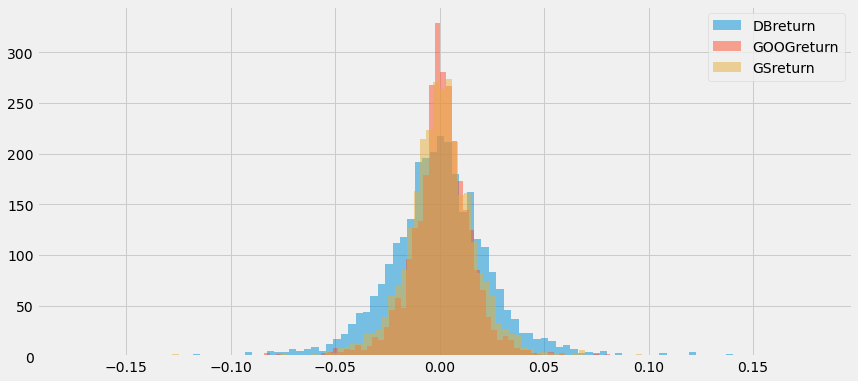

In [22]:
returns['DBreturn'].hist(bins=100, label='DBreturn', alpha=0.5, figsize = (13,6))
returns['GOOGreturn'].hist(bins=100, label='GOOGreturn', alpha=0.5)
returns['GSreturn'].hist(bins=100, label='GSreturn', alpha=0.5)
plt.legend()

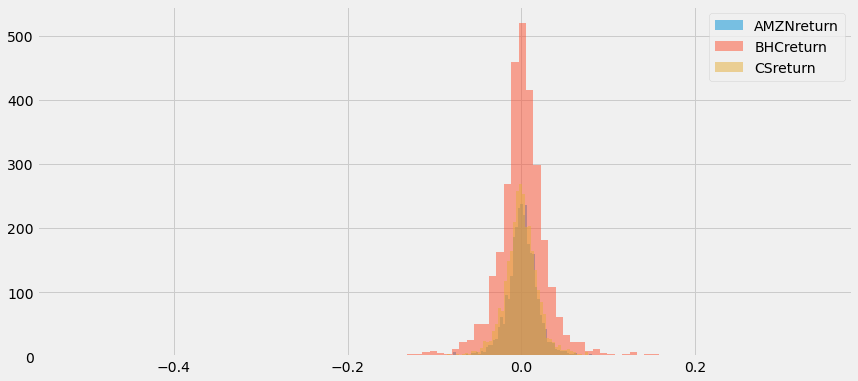

In [23]:
returns['AMZNreturn'].hist(bins=100, label='AMZNreturn', alpha=0.5, figsize = (13,6))
returns['BHCreturn'].hist(bins=100, label='BHCreturn', alpha=0.5)
returns['CSreturn'].hist(bins=100, label='CSreturn', alpha=0.5)
plt.legend()

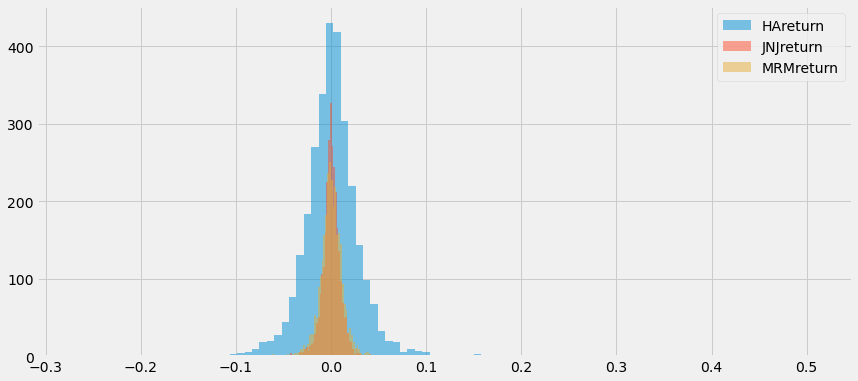

In [24]:
returns['HAreturn'].hist(bins=100, label='HAreturn', alpha=0.5, figsize = (13,6))
returns['JNJreturn'].hist(bins=100, label='JNJreturn', alpha=0.5)
returns['MRKreturn'].hist(bins=100, label='MRMreturn', alpha=0.5)
plt.legend()

<u>Observation</u>: 
Higher the standard deviation, more volatile is the stock. So, in the above figures a volatile stock will cover more area. This is based on the below formula

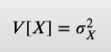

### Understand the stock spread using box plots

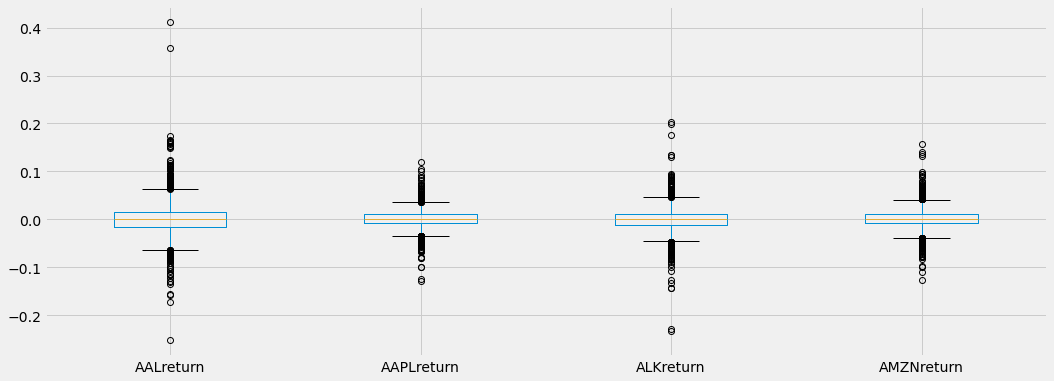

In [25]:
# Create box plots

box_df1 = pd.concat([returns['AALreturn'], returns['AAPLreturn'], returns['ALKreturn'], returns['AMZNreturn']], axis =1)
box_df1.columns=['AALreturn', 'AAPLreturn', 'ALKreturn', 'AMZNreturn']
box_df1.plot(kind='box', figsize = (16,6))

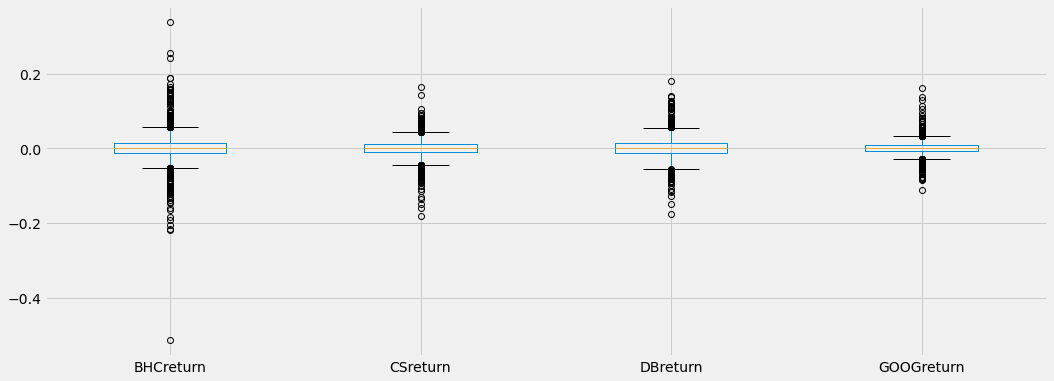

In [26]:
box_df2 = pd.concat([returns['BHCreturn'], returns['CSreturn'], returns['DBreturn'], returns['GOOGreturn']], axis =1)
box_df2.columns=['BHCreturn', 'CSreturn', 'DBreturn', 'GOOGreturn']
box_df2.plot(kind='box', figsize = (16,6))

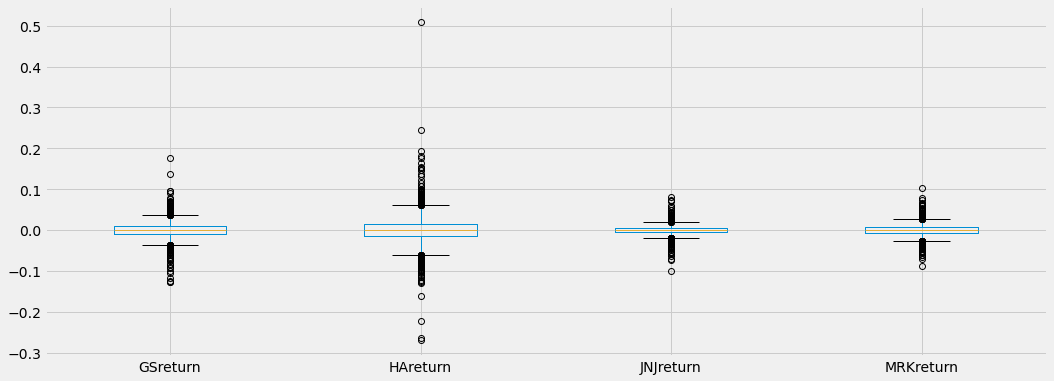

In [27]:
box_df3 = pd.concat([returns['GSreturn'], returns['HAreturn'], returns['JNJreturn'], returns['MRKreturn']], axis =1)
box_df3.columns=['GSreturn', 'HAreturn', 'JNJreturn', 'MRKreturn']
box_df3.plot(kind='box', figsize = (16,6))

<u>Observation</u>: The larger the size of box plot, the spread of the stock return varies

In [28]:
returns.tail()

,AALreturn,AAPLreturn,ALKreturn,AMZNreturn,BHCreturn,CSreturn,DBreturn,GOOGreturn,GSreturn,HAreturn,JNJreturn,MRKreturn,%5EGSPCreturn
Date,,,,,,,,,,,,,
2021-08-25,0.016137,-0.008421,0.009454,-0.001997,0.006629,0.026820,0.011971,0.003873,0.011161,-0.003548,-0.006614,-0.008363,0.002220
2021-08-26,-0.012407,-0.005527,-0.008325,0.005098,-0.025997,-0.018657,-0.031546,-0.005785,-0.001719,-0.006612,-0.005338,-0.006488,-0.005825
2021-08-27,0.016080,0.007185,0.018188,0.010142,0.030249,0.013308,0.011401,0.017080,0.017652,0.035330,-0.002135,-0.003526,0.008808
2021-08-30,-0.035114,0.030417,-0.025936,0.021477,0.005872,-0.009381,-0.015298,0.006358,-0.014511,-0.020772,0.004221,0.002621,0.004307
2021-08-31,0.022040,-0.008425,0.011109,0.014385,0.000343,0.000947,0.009812,-0.000052,-0.000218,0.021212,-0.003052,-0.002745,-0.001349


In [29]:
# Find the datetime stamp value for the minimum entries in dataset

returns.idxmin()

AALreturn       2020-03-18
AAPLreturn      2020-03-16
ALKreturn       2020-03-12
AMZNreturn      2011-10-26
BHCreturn       2016-03-15
CSreturn        2020-03-16
DBreturn        2016-06-24
GOOGreturn      2020-03-16
GSreturn        2010-04-16
HAreturn        2015-01-30
JNJreturn       2018-12-14
MRKreturn       2020-03-16
%5EGSPCreturn   2020-03-16
dtype: datetime64[ns]

In [30]:
# Find the datetime stamp value for the maximum entries in dataset

returns.idxmax()

AALreturn       2020-06-04
AAPLreturn      2020-03-13
ALKreturn       2020-03-24
AMZNreturn      2012-04-27
BHCreturn       2016-11-01
CSreturn        2020-03-24
DBreturn        2011-10-27
GOOGreturn      2015-07-17
GSreturn        2020-03-13
HAreturn        2020-11-09
JNJreturn       2020-03-30
MRKreturn       2016-08-05
%5EGSPCreturn   2020-03-24
dtype: datetime64[ns]

In [31]:
returns.describe()

,AALreturn,AAPLreturn,ALKreturn,AMZNreturn,BHCreturn,CSreturn,DBreturn,GOOGreturn,GSreturn,HAreturn,JNJreturn,MRKreturn,%5EGSPCreturn
count,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000
mean,0.001028,0.001182,0.000940,0.001302,0.000867,-0.000265,-0.000238,0.000897,0.000475,0.000865,0.000394,0.000351,0.000536
std,0.033357,0.017757,0.024235,0.019758,0.034455,0.022273,0.026150,0.016326,0.018411,0.031988,0.010649,0.012959,0.010875
min,-0.252246,-0.128647,-0.232385,-0.126568,-0.514629,-0.182598,-0.174888,-0.111008,-0.127910,-0.269722,-0.100379,-0.088990,-0.119841
25%,-0.015388,-0.007161,-0.010769,-0.008357,-0.012362,-0.010939,-0.013973,-0.006371,-0.008472,-0.014670,-0.004326,-0.006224,-0.003454
50%,0.000000,0.000923,0.000908,0.001121,0.000593,0.000000,-0.000374,0.000700,0.000582,0.000378,0.000307,0.000174,0.000703
75%,0.016469,0.010481,0.012304,0.011496,0.014974,0.011064,0.013962,0.008795,0.009762,0.015521,0.005668,0.007321,0.005397
max,0.410970,0.119808,0.203079,0.157457,0.337444,0.163447,0.179506,0.160524,0.175803,0.508303,0.079977,0.104080,0.093828


Index is in an uptrend and these stocks have given the following returns:

1> Excellent positive returns (greated than 0.7) were generated by Apple Inc Ltd, Google and Goldman Sachs
2> Good returns (0.6 to 0.7) were generated by Alaska Air, Amazon, Credit Suisse, Johnson & Johnson, Merck & Co
3> Average returns (0.5 to 0.6) were generated by American Airlines and Deutsche Bank
4> Poor returns (below 0.5) were generated by Bausch Health and Hawaiian Holdings

<u>Observation</u>: 
We should consider stocks that have given excellent or good returns, but also be aware of the risk if S&P500 moves from uptrend to downtrend, especially those that have a strong positive correlation with S&P500 and are more volatile (Beta factor of a stocks) than the index. Hence, one should design a portfolio considering these factors

## Monthly price movement of the stocks

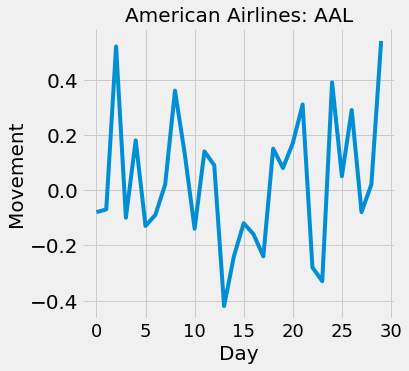

In [32]:
# 'Movement' is the difference of closing and opening prices of a particular day

plt.figure(figsize=(5,5))
plt.title('American Airlines: AAL', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[0][0:30])

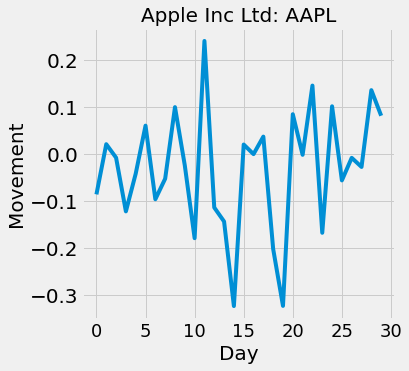

In [33]:
plt.figure(figsize=(5,5))
plt.title('Apple Inc Ltd: AAPL', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[1][0:30])

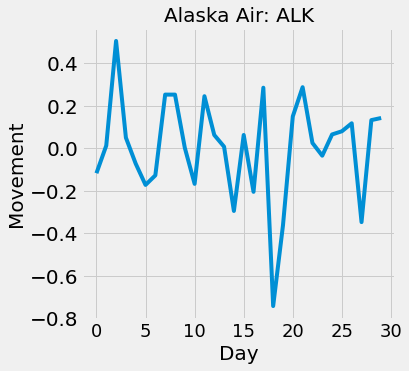

In [34]:
plt.figure(figsize=(5,5))
plt.title('Alaska Air: ALK', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[2][0:30])

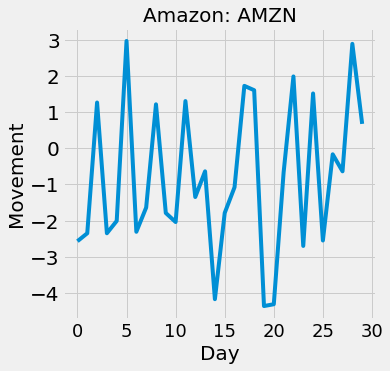

In [35]:
plt.figure(figsize=(5,5))
plt.title('Amazon: AMZN', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[3][0:30])

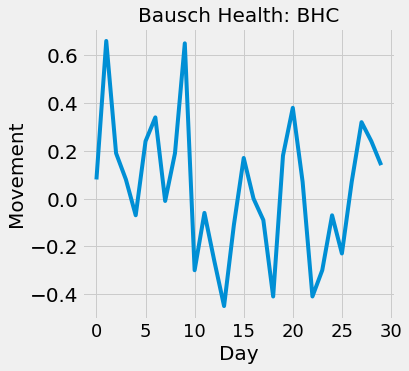

In [36]:
plt.figure(figsize=(5,5))
plt.title('Bausch Health: BHC', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[4][0:30])

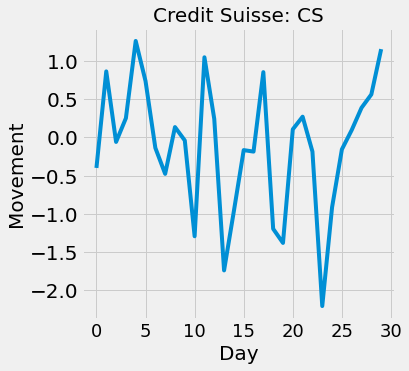

In [37]:
plt.figure(figsize=(5,5))
plt.title('Credit Suisse: CS', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[5][0:30])

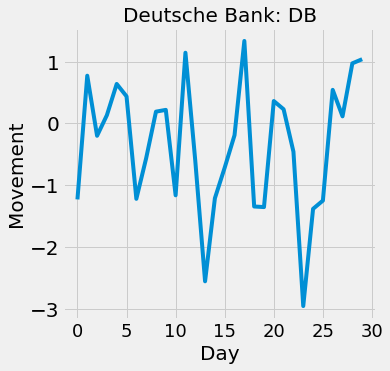

In [38]:
plt.figure(figsize=(5,5))
plt.title('Deutsche Bank: DB', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[6][0:30])

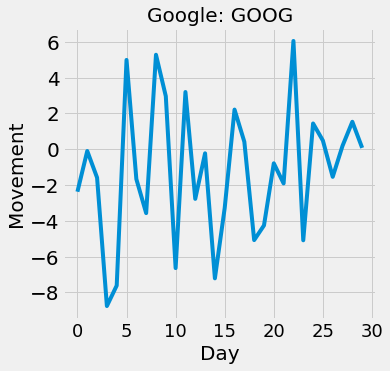

In [39]:
plt.figure(figsize=(5,5))
plt.title('Google: GOOG', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[7][0:30])

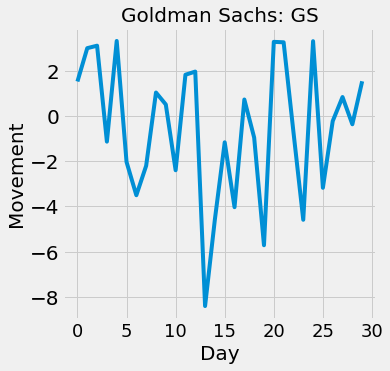

In [40]:
plt.figure(figsize=(5,5))
plt.title('Goldman Sachs: GS', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[8][0:30])

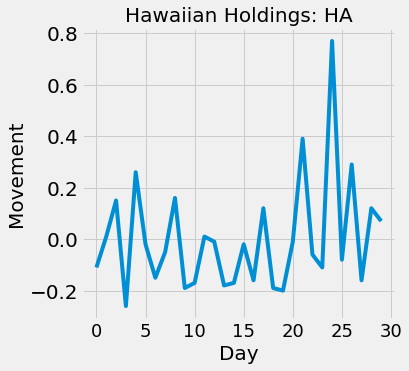

In [41]:
plt.figure(figsize=(5,5))
plt.title('Hawaiian Holdings: HA', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[9][0:30])

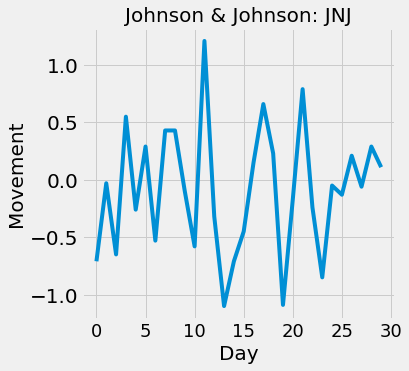

In [42]:
plt.figure(figsize=(5,5))
plt.title('Johnson & Johnson: JNJ', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[10][0:30])

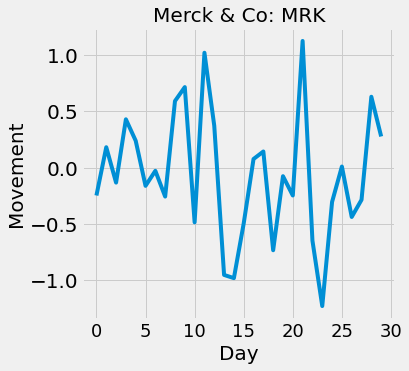

In [43]:
plt.figure(figsize=(5,5))

plt.title('Merck & Co: MRK', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[11][0:30])

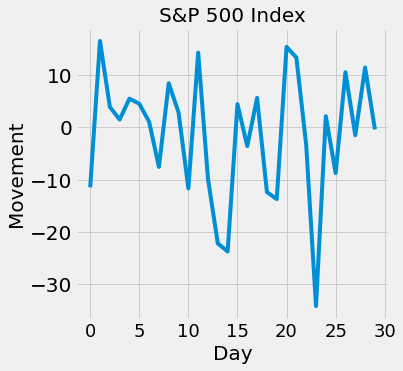

In [44]:
plt.figure(figsize=(5,5))
plt.title('S&P 500 Index', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[12][0:30])

<u>Observation</u>: 
We should consider stocks that have a positive movement suggesting that the price has increased during the month

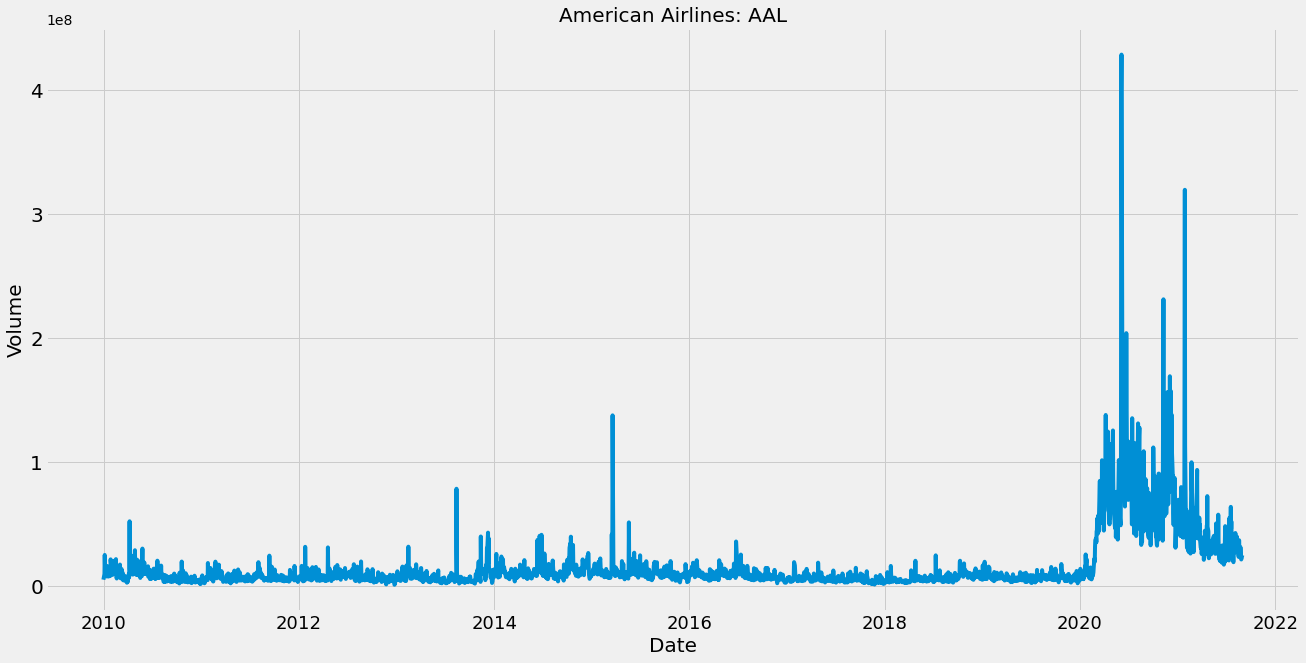

In [45]:
# The 'Volume of stocks traded is plotted below

plt.figure(figsize=(20,10))
plt.title('American Airlines: AAL', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['AAL'], label = 'Open')

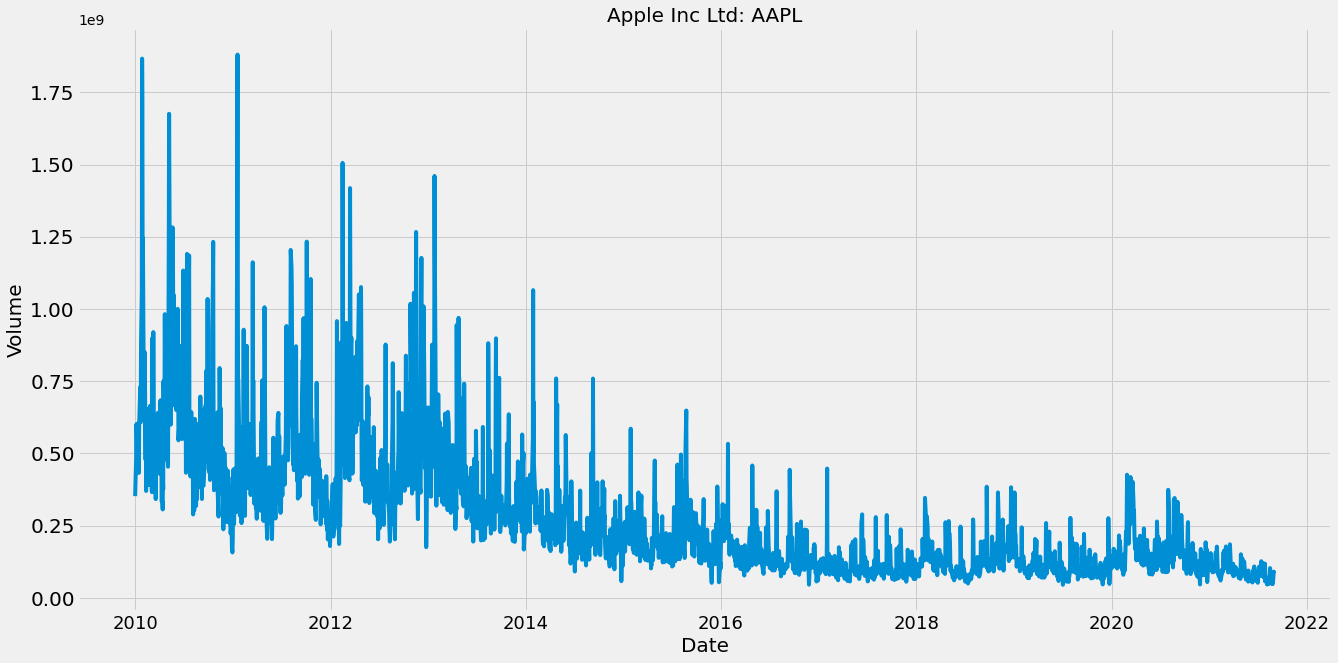

In [46]:
plt.figure(figsize=(20,10))
plt.title('Apple Inc Ltd: AAPL', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['AAPL'], label = 'Open')

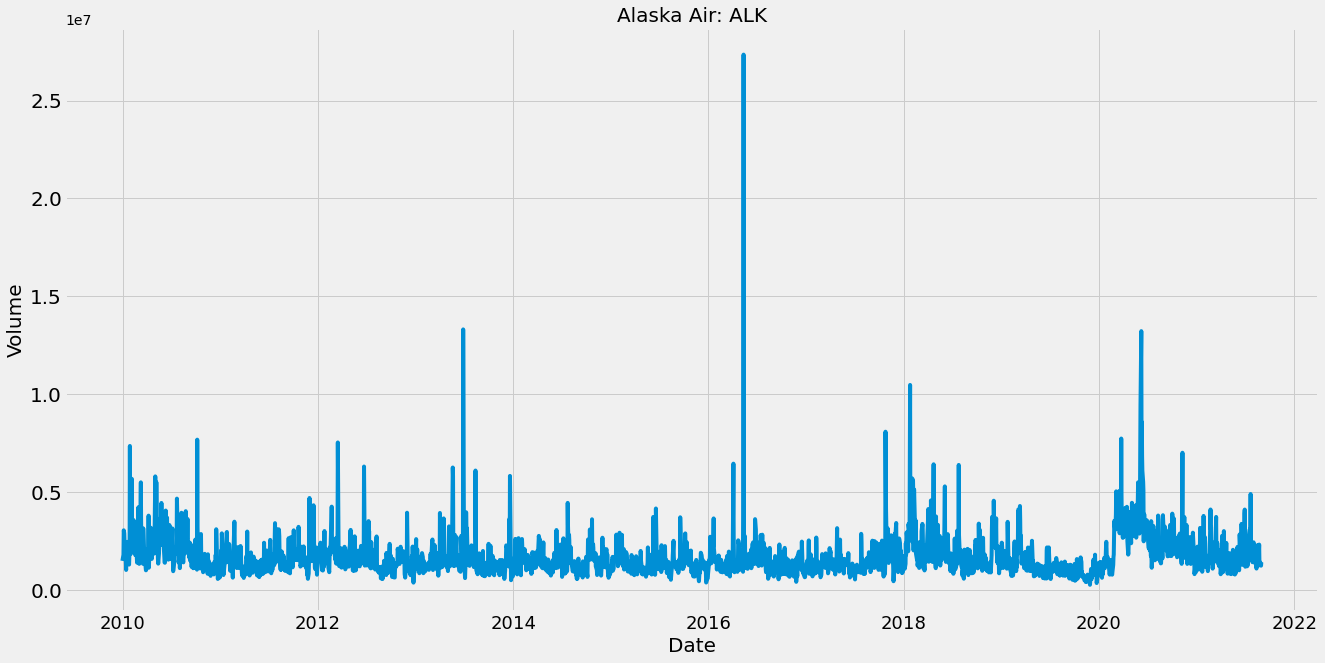

In [47]:
plt.figure(figsize=(20,10))
plt.title('Alaska Air: ALK', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['ALK'], label = 'Open')

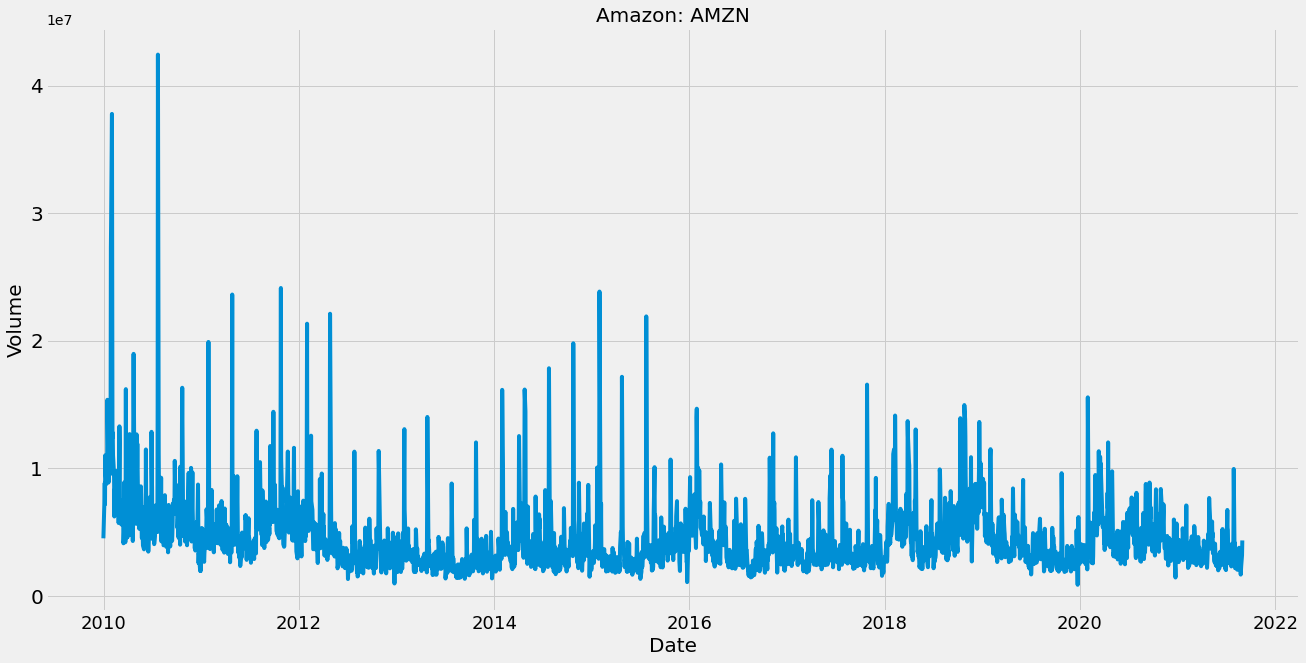

In [48]:
plt.figure(figsize=(20,10))
plt.title('Amazon: AMZN', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['AMZN'], label = 'Open')

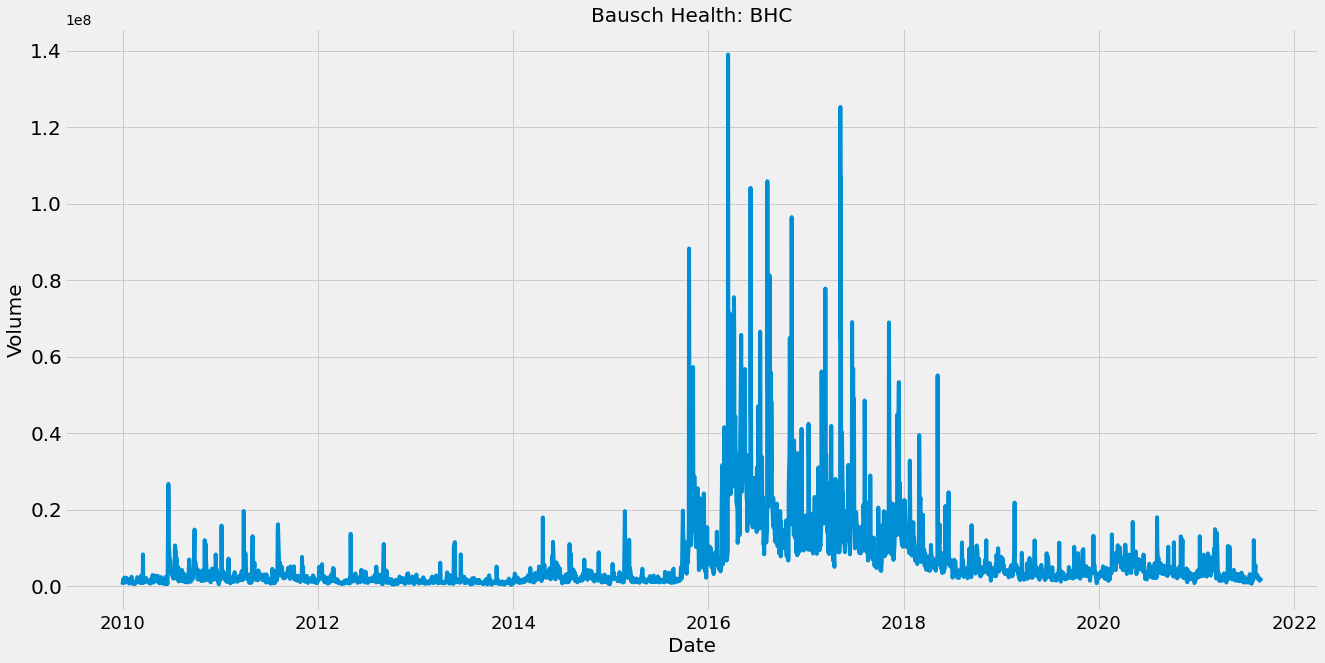

In [49]:
plt.figure(figsize=(20,10))
plt.title('Bausch Health: BHC', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['BHC'], label = 'Open')

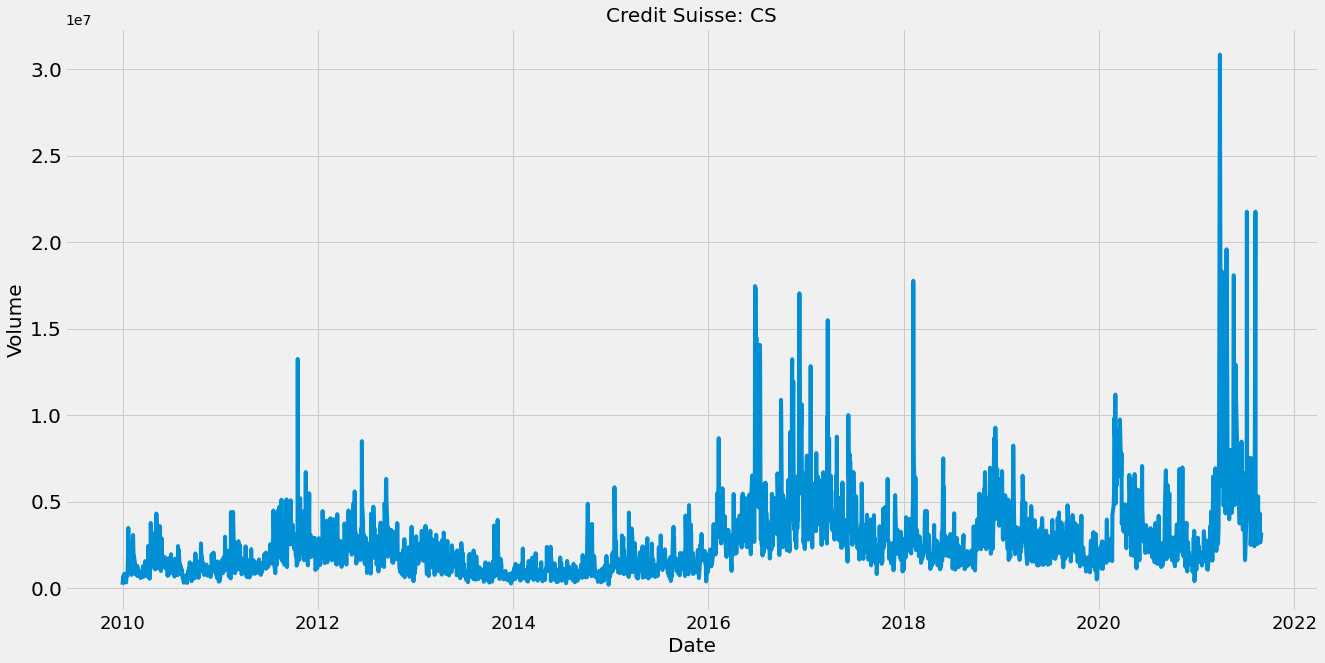

In [50]:
plt.figure(figsize=(20,10))
plt.title('Credit Suisse: CS', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['CS'], label = 'Open')

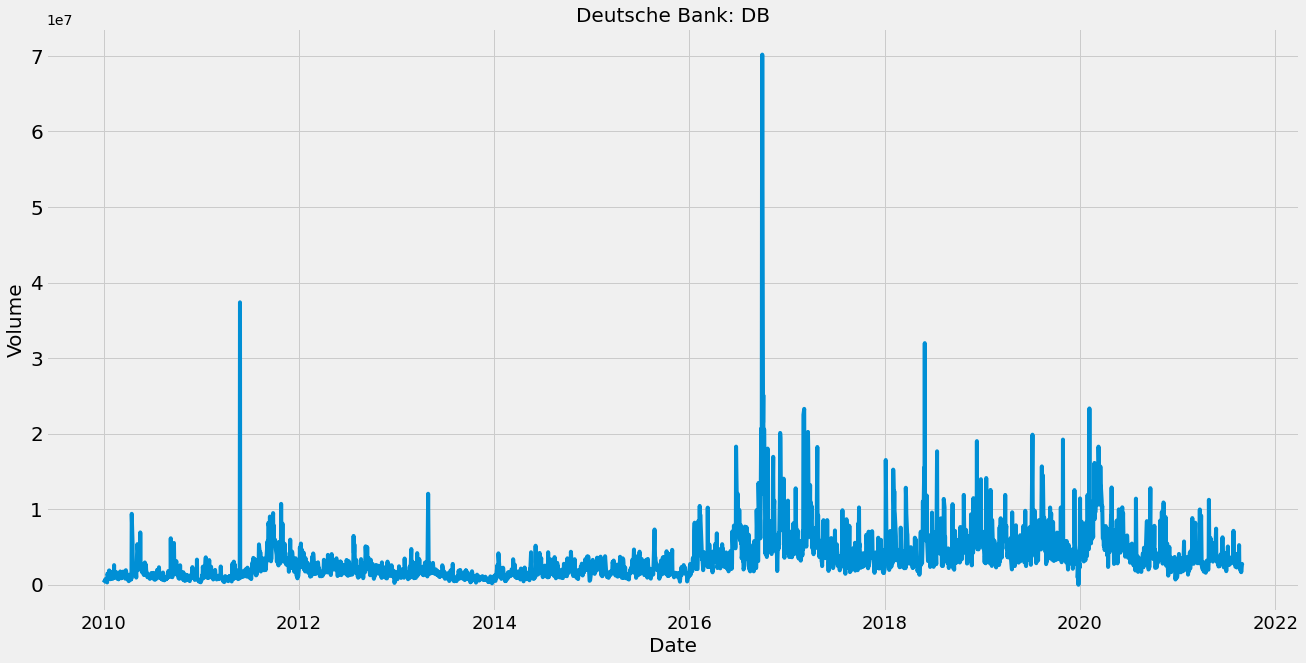

In [51]:
plt.figure(figsize=(20,10))
plt.title('Deutsche Bank: DB', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['DB'], label = 'Open')

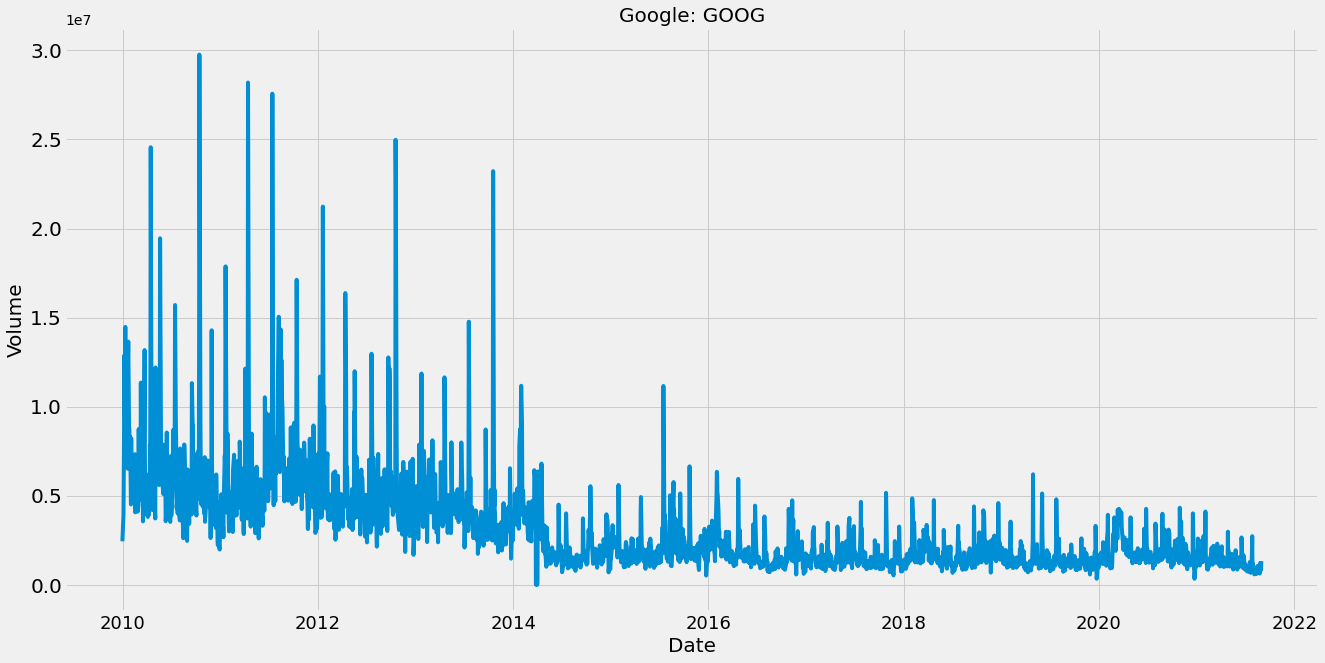

In [52]:
plt.figure(figsize=(20,10))
plt.title('Google: GOOG', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['GOOG'], label = 'Open')

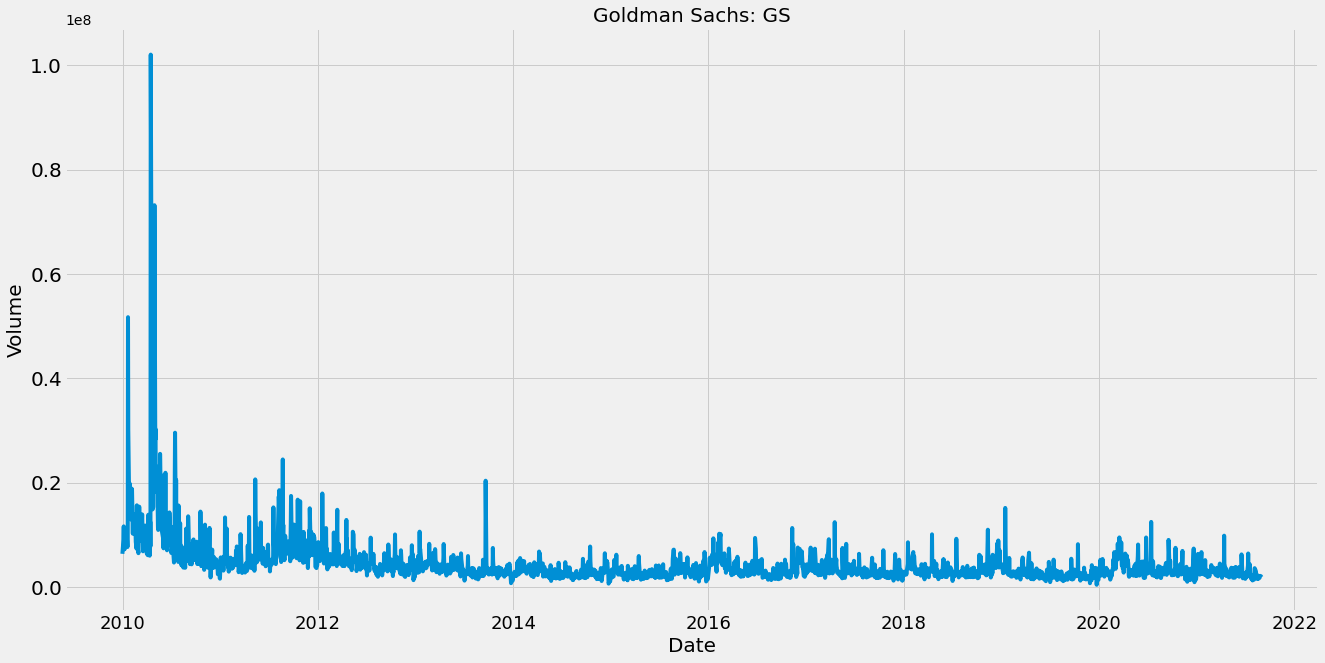

In [53]:
plt.figure(figsize=(20,10))
plt.title('Goldman Sachs: GS', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['GS'], label = 'Open')

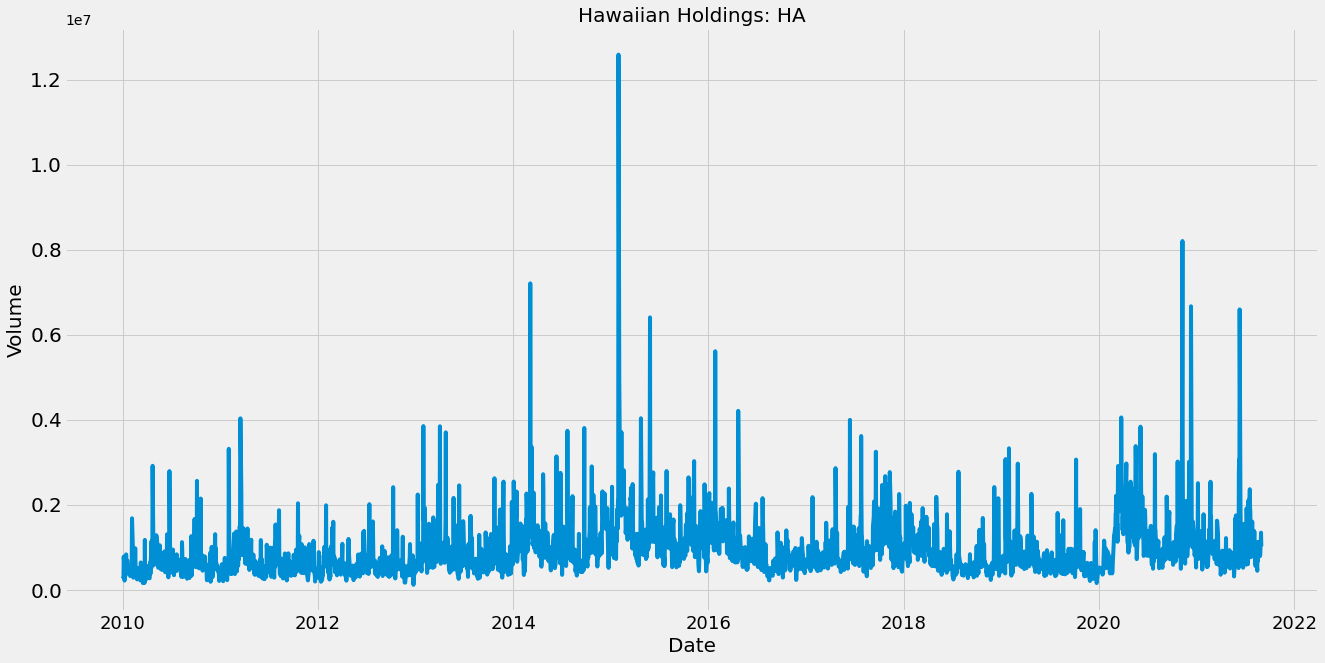

In [54]:
plt.figure(figsize=(20,10))
plt.title('Hawaiian Holdings: HA', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['HA'], label = 'Open')

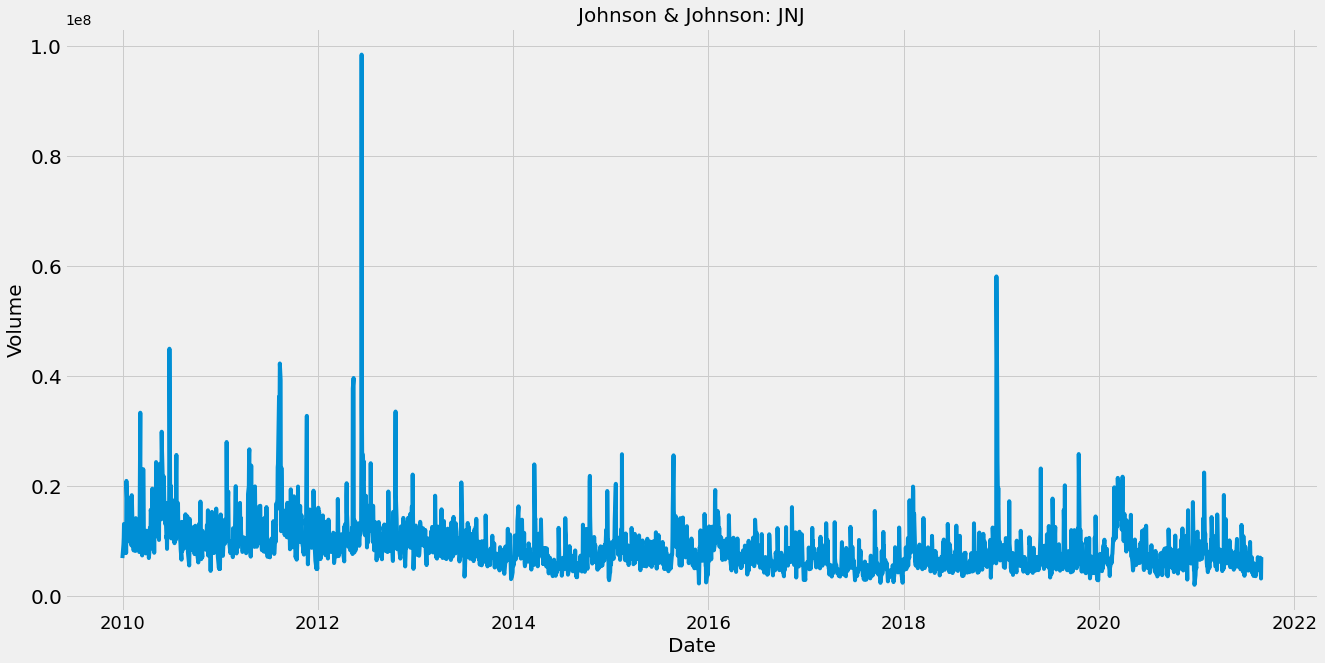

In [55]:
plt.figure(figsize=(20,10))
plt.title('Johnson & Johnson: JNJ', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['JNJ'], label = 'Open')

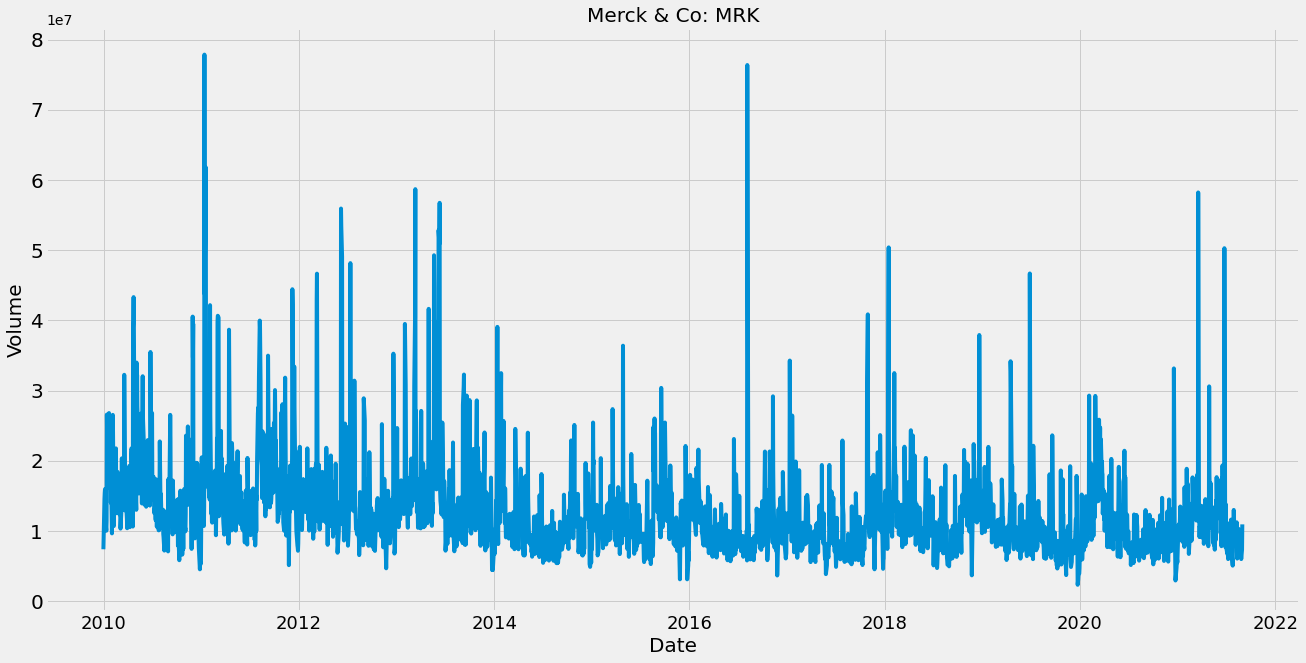

In [56]:
plt.figure(figsize=(20,10))
plt.title('Merck & Co: MRK', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['MRK'], label = 'Open')

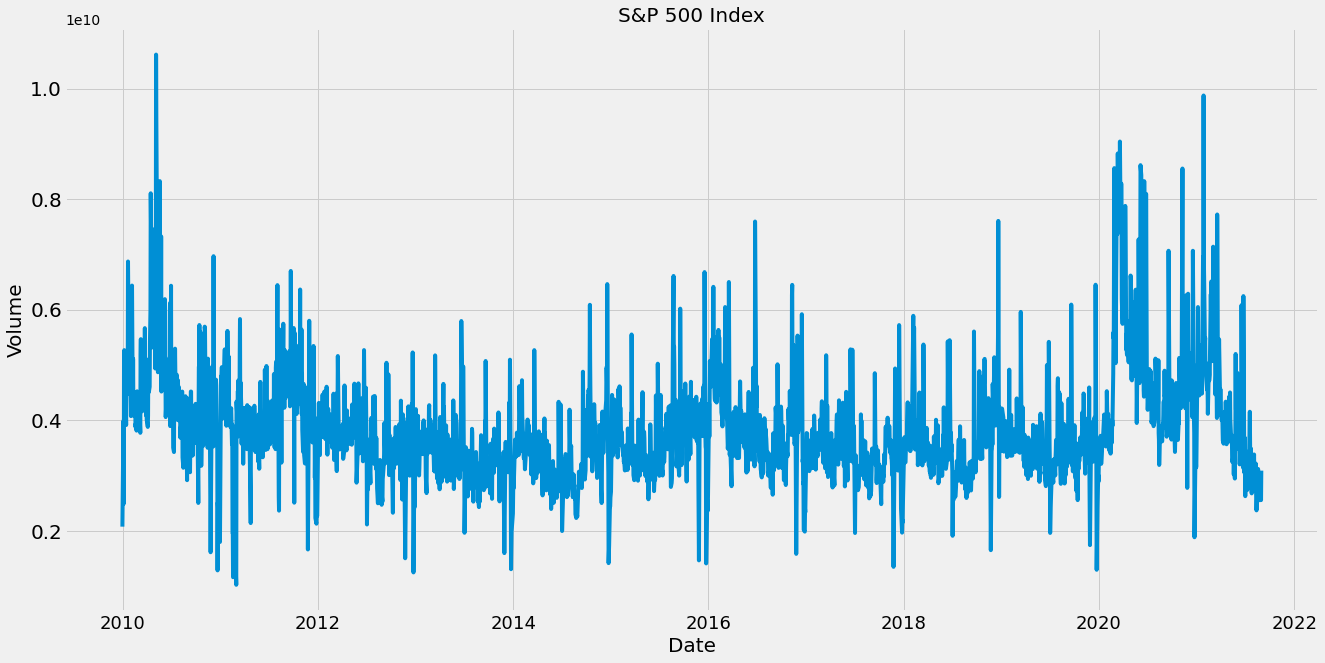

In [57]:
plt.figure(figsize=(20,10))
plt.title('S&P 500 Index', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume'] ['%5EGSPC'], label = 'Open')

<u>Observation</u>: 
Peaks and troughs suggest that there are high and low volumes traded respectively on all these stocks on certain days. This may be due to several factors like State / National election result declaration, COVID lockdown announcements, annual Financial budget, etc

### Normalization

We observe that stock prices of all these stocks are on different scales. Hence, to determine the rate of change of these units in stock prices, we need to normalise the data for it to be consistent in our analysis

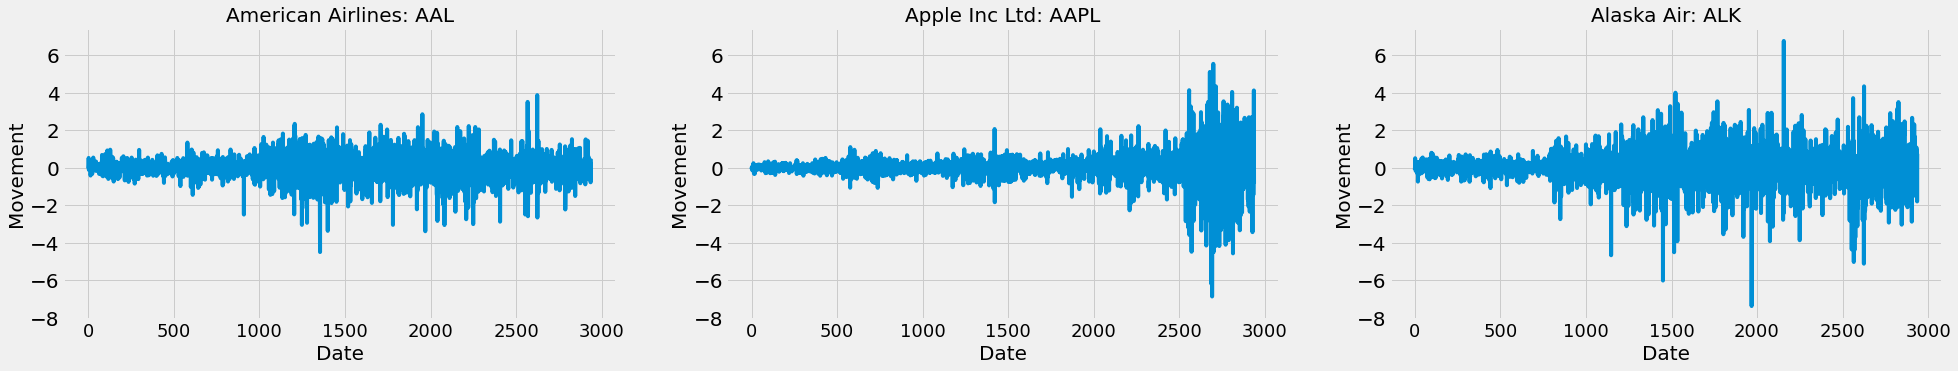

In [58]:
# The stocks are visualised with actual and normalised values

plt.figure(figsize=(30,5))

ax1 = plt.subplot(1,3,1)

plt.title('American Airlines: AAL', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[0])

plt.subplot(1,3,2, sharey=ax1)
plt.title('Apple Inc Ltd: AAPL', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[1])

plt.subplot(1,3,3, sharey=ax1)
plt.title('Alaska Air: ALK', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[2])


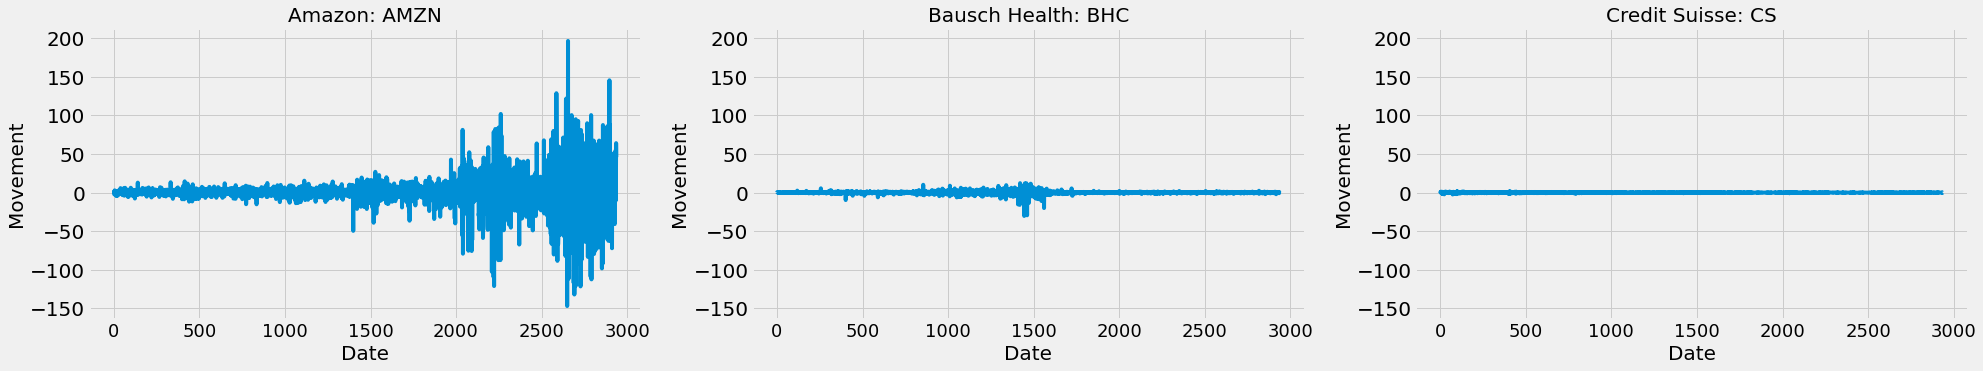

In [59]:
plt.figure(figsize=(30,5))

ax1 = plt.subplot(1,3,1)

plt.title('Amazon: AMZN', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[3])

plt.subplot(1,3,2, sharey=ax1)
plt.title('Bausch Health: BHC', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[4])

plt.subplot(1,3,3, sharey=ax1)
plt.title('Credit Suisse: CS', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[5])

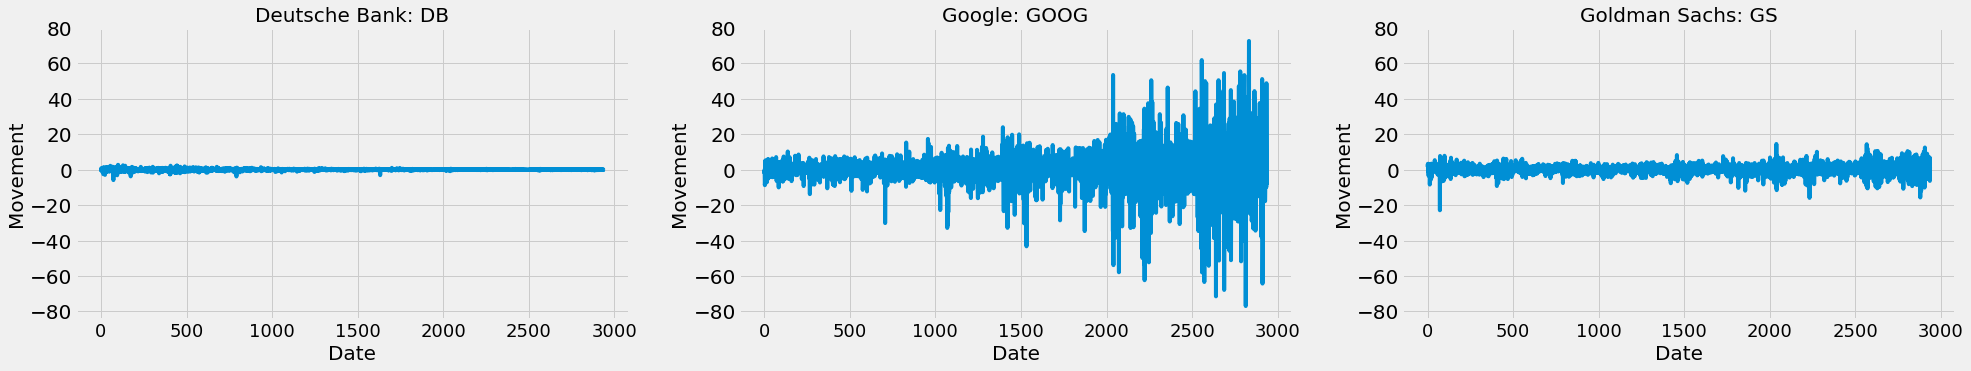

In [60]:
plt.figure(figsize=(30,5))

ax1 = plt.subplot(1,3,1)

plt.title('Deutsche Bank: DB', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[6])

plt.subplot(1,3,2, sharey=ax1)
plt.title('Google: GOOG', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[7])

plt.subplot(1,3,3, sharey=ax1)
plt.title('Goldman Sachs: GS', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[8])

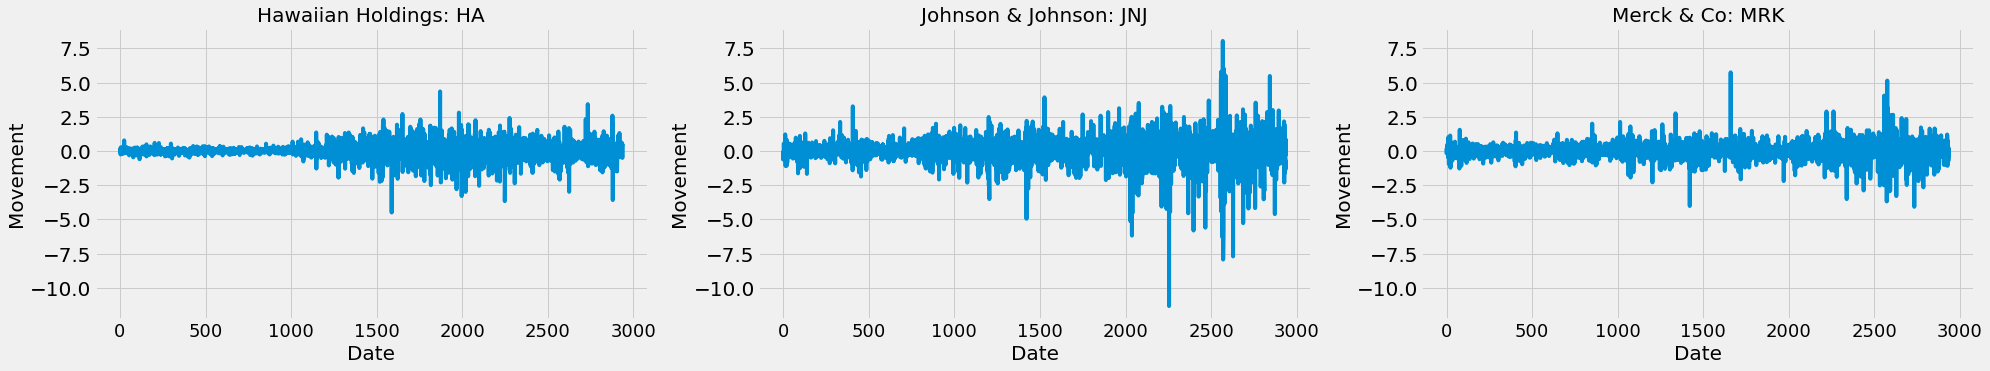

In [61]:
plt.figure(figsize=(30,5))

ax1 = plt.subplot(1,3,1)

plt.title('Hawaiian Holdings: HA', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[9])

plt.subplot(1,3,2, sharey=ax1)
plt.title('Johnson & Johnson: JNJ', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[10])

plt.subplot(1,3,3, sharey=ax1)
plt.title('Merck & Co: MRK', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[11])

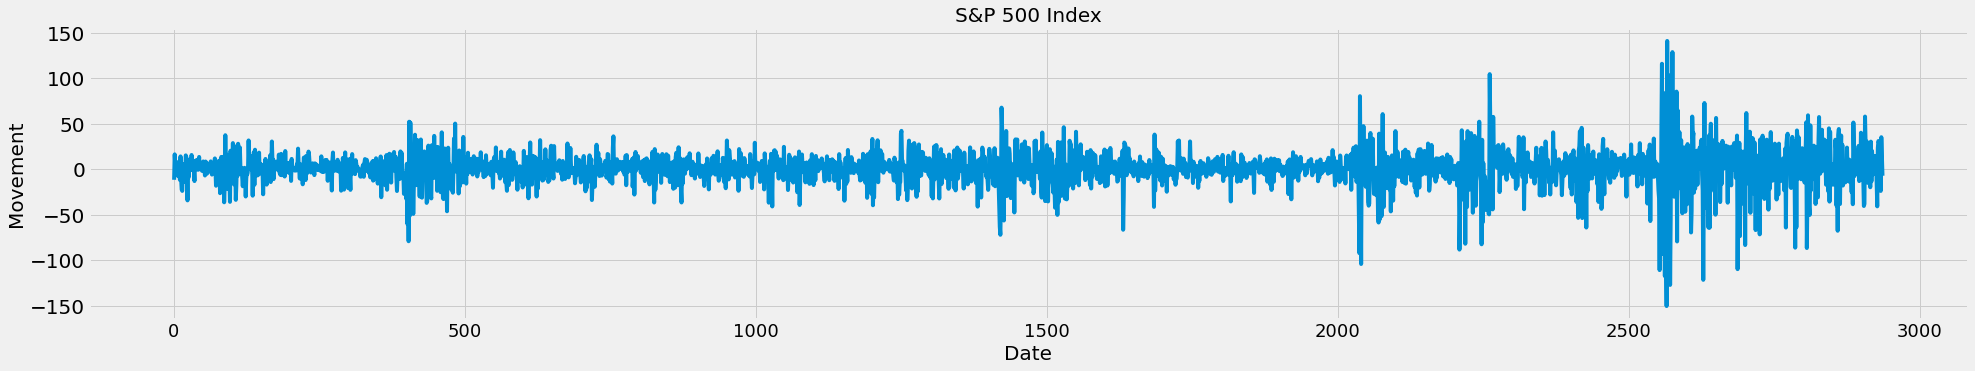

In [62]:
plt.figure(figsize=(30,5))

plt.title('S&P 500 Index', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[12])

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Initialize a normalizer
normalizer = Normalizer()

# Fit and transform
norm_movements = normalizer.fit_transform(movements)

In [64]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.28602858718162794
0.17048774880279918
-7.07631758107183e-05


### After normalizing we note that min to max values are in the range of -1 to 1

### We check the movements between a scale of -1 to 1 after normalizing this data

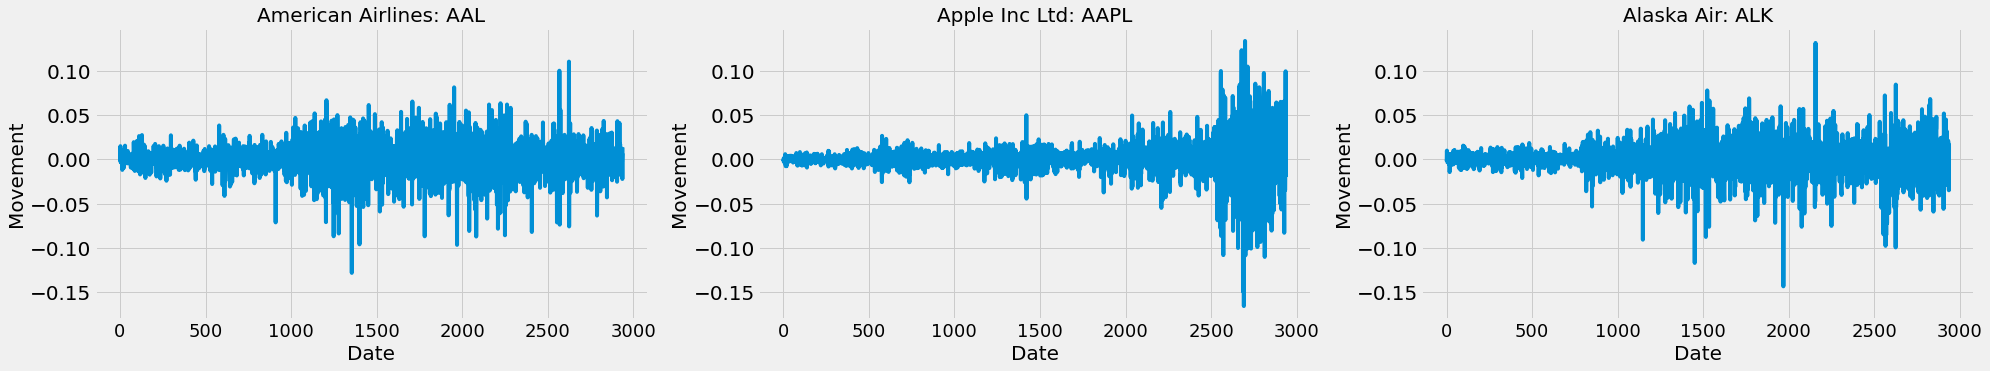

In [65]:
# Check for movement post normalization

plt.figure(figsize=(30,5))

ax1 = plt.subplot(1,3,1)

plt.title('American Airlines: AAL', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[0])

plt.subplot(1,3,2, sharey=ax1)
plt.title('Apple Inc Ltd: AAPL', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[1])

plt.subplot(1,3,3, sharey=ax1)
plt.title('Alaska Air: ALK', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[2])

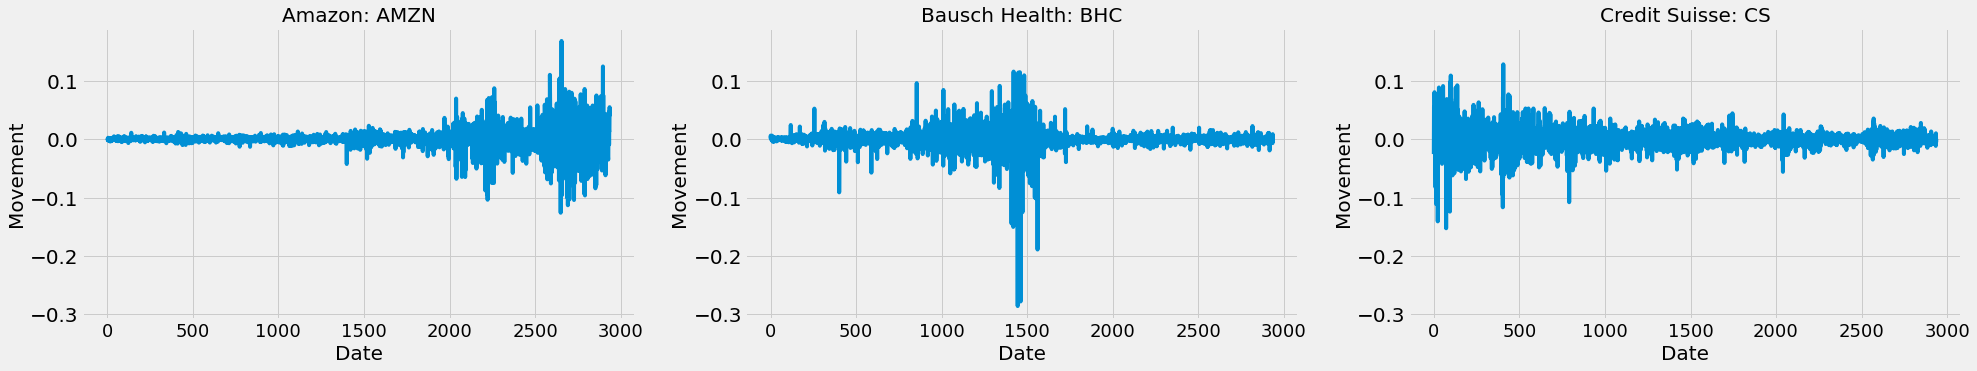

In [66]:
plt.figure(figsize=(30,5))

ax1 = plt.subplot(1,3,1)

plt.title('Amazon: AMZN', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[3])

plt.subplot(1,3,2, sharey=ax1)
plt.title('Bausch Health: BHC', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[4])

plt.subplot(1,3,3, sharey=ax1)
plt.title('Credit Suisse: CS', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[5])

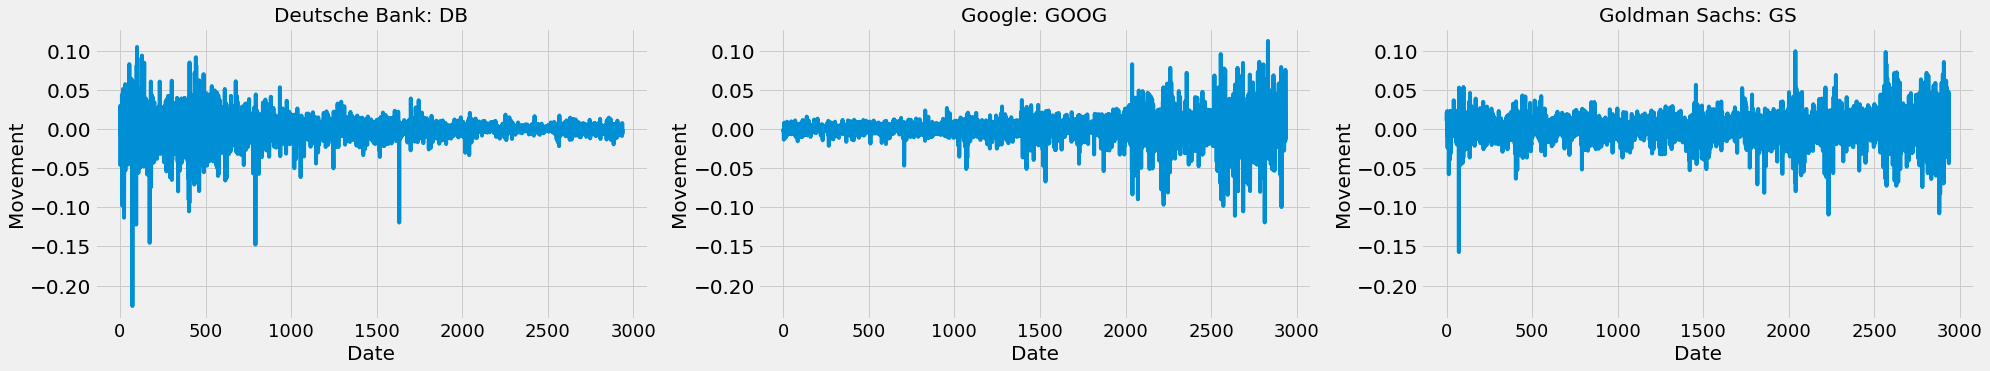

In [67]:
plt.figure(figsize=(30,5))

ax1 = plt.subplot(1,3,1)

plt.title('Deutsche Bank: DB', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[6])

plt.subplot(1,3,2, sharey=ax1)
plt.title('Google: GOOG', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[7])

plt.subplot(1,3,3, sharey=ax1)
plt.title('Goldman Sachs: GS', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[8])

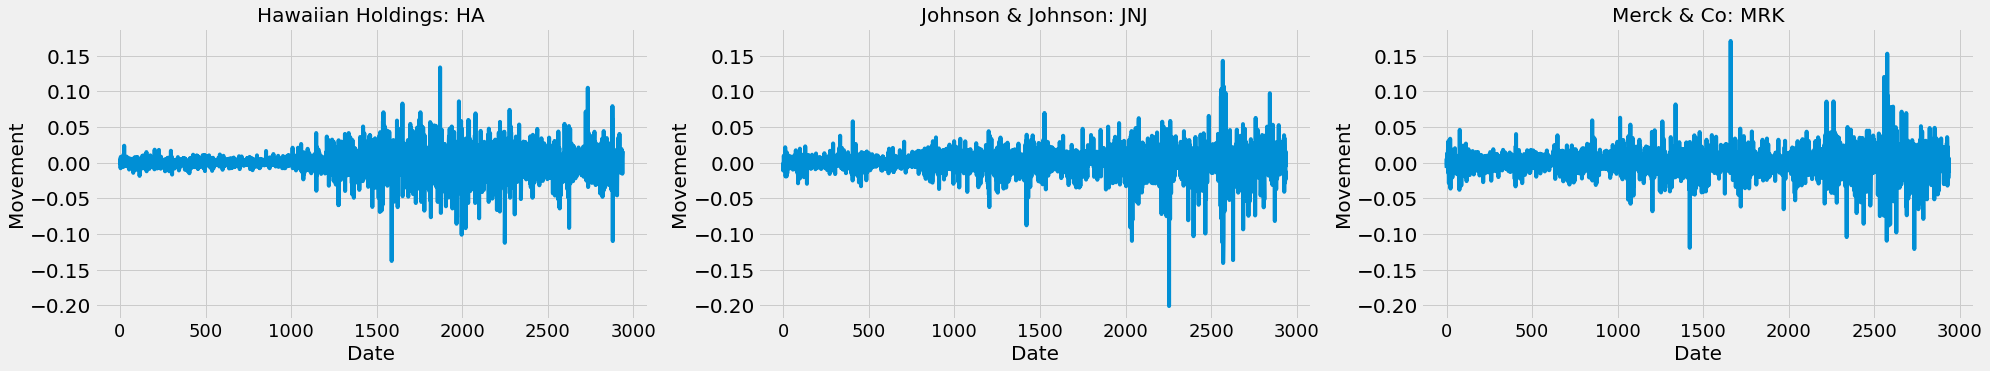

In [68]:
plt.figure(figsize=(30,5))

ax1 = plt.subplot(1,3,1)

plt.title('Hawaiian Holdings: HA', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[9])

plt.subplot(1,3,2, sharey=ax1)
plt.title('Johnson & Johnson: JNJ', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[10])

plt.subplot(1,3,3, sharey=ax1)
plt.title('Merck & Co: MRK', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[11])

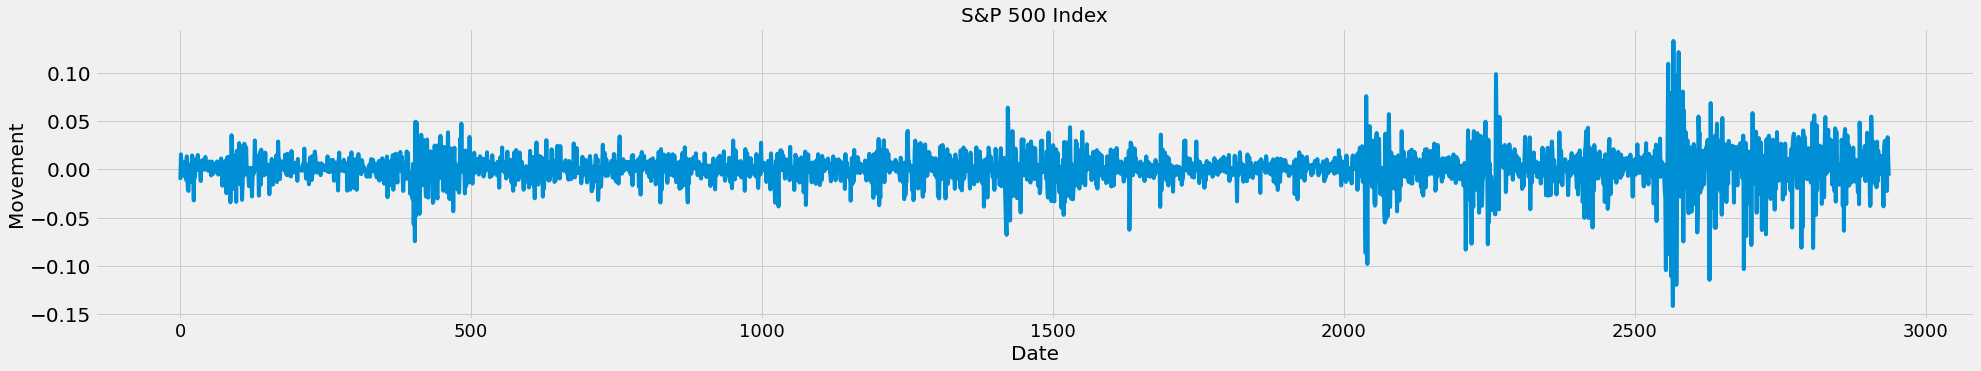

In [69]:
plt.figure(figsize=(30,5))

plt.title('S&P 500 Index', fontsize=20)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(norm_movements[12])

<u>Observation</u>: 
We can clearly note that S&P500 in recent times has been moving more frequently (increase in volatility)

# Creating a pipeline and apply k-means clustering 

In [70]:
# Initialize the necessary packages

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Initialize a normalizer
normalizer = Normalizer()

# Create k-means model
kmeans = KMeans(n_clusters = 4, max_iter=1000, random_state=1)

# Make a pipeline combining our normalizer and k-means model
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to daily stock movements created earlier
pipeline.fit(movements)
predictions = pipeline.predict(movements)

In [71]:
predictions

array([3, 1, 3, 1, 2, 0, 0, 1, 0, 3, 2, 2, 1])

In [72]:
# The companies and their respective clusters will be displayed 

df4 = pd.DataFrame({'Cluster': predictions, 'companies':list(companies_dict)})

df4

,Cluster,companies
0,3,American Airlines
1,1,Apple Inc Ltd
2,3,Alaska Air
3,1,Amazon
4,2,Bausch Health
5,0,Credit Suisse
6,0,Deutsche Bank
7,1,Google
8,0,Goldman Sachs
9,3,Hawaiian Holdings


In [73]:
df4[df4['Cluster']==0]

,Cluster,companies
5,0,Credit Suisse
6,0,Deutsche Bank
8,0,Goldman Sachs


In [74]:
df4[df4['Cluster']==1]

,Cluster,companies
1,1,Apple Inc Ltd
3,1,Amazon
7,1,Google
12,1,S&P 500 Index


In [75]:
df4[df4['Cluster']==2]

,Cluster,companies
4,2,Bausch Health
10,2,Johnson & Johnson
11,2,Merck & Co


In [76]:
df4[df4['Cluster']==3]

,Cluster,companies
0,3,American Airlines
2,3,Alaska Air
9,3,Hawaiian Holdings


# Dimension Reduction using Principal Component Analysis (PCA)

In [77]:
# Let us check the shape of our normalized movement data
norm_movements.shape

(13, 2937)

In [78]:
# Initialize the necessary packages

from sklearn.decomposition import PCA

# Initialize a normalizer
normalizer = Normalizer()

# Reduce the dimension
pca_data = PCA(n_components = 2)

# Create k-means model
kmeans = KMeans(n_clusters = 4, max_iter=1000, random_state=1)

# Make a pipeline combining our normalizer, PCA and k-means model
pipeline = make_pipeline(normalizer, pca_data, kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)
predictions = pipeline.predict(movements)

In [79]:
# Create a dataframe to store companies and predicted clusters

df5 = pd.DataFrame({'Clusters': predictions, 'companies':list(companies_dict.keys())}).sort_values(by=['Clusters'],axis=0)

df5

,Clusters,companies
0,0,American Airlines
2,0,Alaska Air
9,0,Hawaiian Holdings
4,1,Bausch Health
8,1,Goldman Sachs
10,1,Johnson & Johnson
11,1,Merck & Co
12,1,S&P 500 Index
5,2,Credit Suisse
6,2,Deutsche Bank


In [80]:
df4 = pd.DataFrame({'Clusters': predictions, 'companies':list(companies_dict.keys())}).sort_values(by=['Clusters'],axis=0)

df4

,Clusters,companies
0,0,American Airlines
2,0,Alaska Air
9,0,Hawaiian Holdings
4,1,Bausch Health
8,1,Goldman Sachs
10,1,Johnson & Johnson
11,1,Merck & Co
12,1,S&P 500 Index
5,2,Credit Suisse
6,2,Deutsche Bank


### Plotting the Decision Boundary

<Figure size 432x288 with 0 Axes>

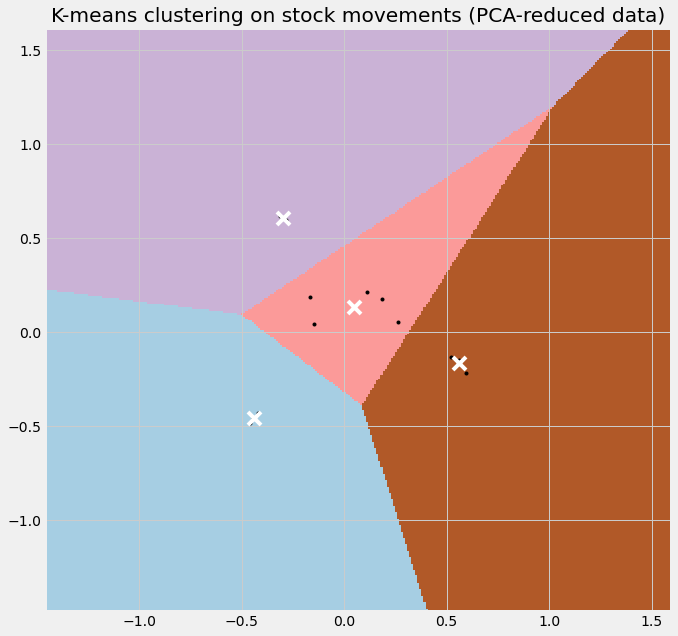

In [81]:
from sklearn.decomposition import PCA

# Reduce the data dimensionality
pca_data = PCA(n_components = 2).fit_transform(norm_movements)

# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min,x_max = pca_data[:,0].min()-1, pca_data[:,0].max() + 1
y_min,y_max = pca_data[:,1].min()-1, pca_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
kpredictions = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
kpredictions = kpredictions.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(kpredictions,interpolation = 'nearest', extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto', origin ='lower')
plt.plot(pca_data[:,0],pca_data[:,1],'k.')

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=169, linewidths=3, color='w',zorder=10)
plt.title('K-means clustering on stock movements (PCA-reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.show()

### Sharpe Ratio Calculation

In [82]:
import pandas_datareader as web
from tabulate import tabulate

In [83]:
def sharpe_ratio(stocks, start_date1, end_date1, rfr):
    data = pd.DataFrame()
    ret = pd.DataFrame()
    for i in df['Close']:
        data[i] = web.DataReader(i, data_source = 'yahoo', start=start_date1, end=end_date1)['Close']
        ret[i] = data[i].pct_change()
        cumu_i =(data[i][-1]/data[i][0]-1)
        std_i = ret[i].std()*np.sqrt(252)
        sharpe_i =(cumu_i - rfr/100) / std_i
        print(tabulate([['Stock','Cumulative Return (%)','Standard Deviation (%)', 'Sharpe Ratio'],
                        [i, round(cumu_i,4)*100, round(std_i,4)*100, round(sharpe_i,4)]], headers='firstrow'))
        print("\n")

In [84]:
sharpe_ratio(['AAL','AAPL','ALK','AMZN','BHC','CS','DB','GOOG','GS','HA','JNJ', 'MRK'], '2010-01-01','2020-8-31',6)

Stock      Cumulative Return (%)    Standard Deviation (%)    Sharpe Ratio
-------  -----------------------  ------------------------  --------------
AAL                       169.63                     53.06          3.0836


Stock      Cumulative Return (%)    Standard Deviation (%)    Sharpe Ratio
-------  -----------------------  ------------------------  --------------
AAPL                     1614.57                     27.87         57.7162


Stock      Cumulative Return (%)    Standard Deviation (%)    Sharpe Ratio
-------  -----------------------  ------------------------  --------------
ALK                       350.81                     37.96          9.0833


Stock      Cumulative Return (%)    Standard Deviation (%)    Sharpe Ratio
-------  -----------------------  ------------------------  --------------
AMZN                     2465.39                     31.59         77.8586


Stock      Cumulative Return (%)    Standard Deviation (%)    Sharpe Ratio
-------  --------

# Capital Asset Pricing Model

Calculate expected return from the portfolio using the CAPM formula. I will calculate it based on the returns from the last 6 yrs starting from 1st Jan 2010 till 31st Aug 2021

In [85]:
df_close = web.DataReader(['AAL','AAPL','ALK','AMZN','BHC','CS','DB','GOOG','GS','HA','JNJ', 'MRK', '%5EGSPC'], data_source='yahoo', start='1-1-2010', end='8-31-2021')['Close']
df_close

Symbols,AAL,AAPL,ALK,AMZN,BHC,CS,DB,GOOG,GS,HA,JNJ,MRK,%5EGSPC
Date,,,,,,,,,,,,,
2009-12-31,4.840000,7.526071,8.640000,134.520004,13.960000,48.007812,67.662216,308.832428,168.839996,7.000000,64.410004,34.866413,1115.099976
2010-01-04,4.770000,7.643214,8.717500,133.899994,14.680000,50.771484,69.875954,312.204773,173.080002,7.100000,64.680000,35.314884,1132.989990
2010-01-05,5.310000,7.656429,9.195000,134.690002,14.880000,51.191406,71.211830,310.829926,176.139999,7.210000,63.930000,35.458015,1136.520020
2010-01-06,5.090000,7.534643,9.112500,132.250000,14.970000,50.478516,69.980919,302.994293,174.259995,6.940000,64.449997,35.935116,1137.140015
2010-01-07,5.240000,7.520714,9.065000,130.000000,14.800000,52.519531,70.772903,295.940735,177.669998,7.210000,63.990002,35.992367,1141.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,20.150000,148.360001,57.660000,3299.179932,28.850000,10.720000,12.680000,2859.000000,413.119995,19.660000,174.229996,77.070000,4496.189941
2021-08-26,19.900000,147.539993,57.180000,3316.000000,28.100000,10.520000,12.280000,2842.459961,412.410004,19.530001,173.300003,76.570000,4470.000000
2021-08-27,20.219999,148.600006,58.220001,3349.629883,28.950001,10.660000,12.420000,2891.010010,419.690002,20.219999,172.929993,76.300003,4509.370117


In [86]:
ret_AAPL = (df_close['AAPL'][-1] / df_close['AAPL'][0]) - 1
ret_AAPL

19.17387297915552

In [87]:
ret_SnP500 = (df_close['%5EGSPC'][-1] / df_close['%5EGSPC'][0]) - 1
ret_SnP500

3.0558517395758837

# CAPM = Risk Free Rate + beta * (Market Return - Risk Free Rate)

In [88]:
ret = df_close.pct_change().dropna()

In [89]:
ret.head()

Symbols,AAL,AAPL,ALK,AMZN,BHC,CS,DB,GOOG,GS,HA,JNJ,MRK,%5EGSPC
Date,,,,,,,,,,,,,
2010-01-04,-0.014463,0.015565,0.008970,-0.004609,0.051576,0.057567,0.032717,0.010920,0.025113,0.014286,0.004192,0.012863,0.016043
2010-01-05,0.113208,0.001729,0.054775,0.005900,0.013624,0.008271,0.019118,-0.004404,0.017680,0.015493,-0.011596,0.004053,0.003116
2010-01-06,-0.041431,-0.015906,-0.008972,-0.018116,0.006048,-0.013926,-0.017285,-0.025209,-0.010673,-0.037448,0.008134,0.013455,0.000546
2010-01-07,0.029469,-0.001849,-0.005213,-0.017013,-0.011356,0.040433,0.011317,-0.023280,0.019568,0.038905,-0.007137,0.001593,0.004001
2010-01-08,-0.019084,0.006648,-0.019857,0.027077,0.012838,0.014689,0.036133,0.013331,-0.018911,-0.004161,0.003438,-0.000530,0.002882


In [90]:
# Import stats mnodel
from scipy import stats

beta_AAL = stats.linregress(ret['AAL'], ret['%5EGSPC'])[0]
beta_AAPL = stats.linregress(ret['AAPL'], ret['%5EGSPC'])[0]
beta_ALK = stats.linregress(ret['ALK'], ret['%5EGSPC'])[0]
beta_AMZN = stats.linregress(ret['AMZN'], ret['%5EGSPC'])[0]
beta_BHC = stats.linregress(ret['BHC'], ret['%5EGSPC'])[0]
beta_CS = stats.linregress(ret['CS'], ret['%5EGSPC'])[0]
beta_DB = stats.linregress(ret['DB'], ret['%5EGSPC'])[0]
beta_GOOG = stats.linregress(ret['GOOG'], ret['%5EGSPC'])[0]
beta_GS = stats.linregress(ret['GS'], ret['%5EGSPC'])[0]
beta_HA = stats.linregress(ret['HA'], ret['%5EGSPC'])[0]
beta_JNJ = stats.linregress(ret['JNJ'], ret['%5EGSPC'])[0]
beta_MRK = stats.linregress(ret['MRK'], ret['%5EGSPC'])[0]

In [91]:
# Check beta values for one of the stocks

beta_AAL

0.14718511594034067

In [92]:
# Risk free rate is given as 0.75% based on 10-year US Treasury bond yield

rf = 0.75/100

### Formula: CAPM = rf + beta * (ret_SnP500)

In [93]:
# CAPM calculation for every stock

capm_AAL = rf + beta_AAL * (ret_SnP500)
capm_AAPL = rf + beta_AAPL * (ret_SnP500)
capm_ALK = rf + beta_ALK * (ret_SnP500)
capm_AMZN = rf + beta_AMZN * (ret_SnP500)
capm_BHC = rf + beta_BHC * (ret_SnP500)
capm_CS = rf + beta_CS * (ret_SnP500)
capm_DB = rf + beta_DB * (ret_SnP500)
capm_GOOG = rf + beta_GOOG * (ret_SnP500)
capm_GS = rf + beta_GS * (ret_SnP500)
capm_HA = rf + beta_HA * (ret_SnP500)
capm_JNJ = rf + beta_JNJ * (ret_SnP500)
capm_MRK = rf + beta_MRK * (ret_SnP500)

In [94]:
print ('American Airlines: AAL expected return is {0:.2f}'.format(capm_AAL*100))

American Airlines: AAL expected return is 45.73


In [95]:
print ('Apple Inc Ltd: AAPL expected return is {0:.2f}'.format(capm_AAPL*100))

Apple Inc Ltd: AAPL expected return is 124.31


In [96]:
print ('Alaska Air: ALK expected return is {0:.2f}'.format(capm_ALK*100))

Alaska Air: ALK expected return is 78.54


In [97]:
print ('Amazon: AMZN expected return is {0:.2f}'.format(capm_AMZN*100))

Amazon: AMZN expected return is 94.28


In [98]:
print ('Bausch Health: BHC expected return is {0:.2f}'.format(capm_BHC*100))

Bausch Health: BHC expected return is 38.95


In [99]:
print ('Credit Suisse: CS expected return is {0:.2f}'.format(capm_CS*100))

Credit Suisse: CS expected return is 100.84


In [100]:
print ('Deutsche Bank: DB expected return is {0:.2f}'.format(capm_DB*100))

Deutsche Bank: DB expected return is 81.82


In [101]:
print ('Google: GOOG expected return is {0:.2f}'.format(capm_GOOG*100))

Google: GOOG expected return is 139.67


In [102]:
print ('Goldman Sachs: GS expected return is {0:.2f}'.format(capm_GS*100))

Goldman Sachs: GS expected return is 134.30


In [103]:
print ('Hawaiian Holdings: HA expected return is {0:.2f}'.format(capm_HA*100))

Hawaiian Holdings: HA expected return is 44.93


In [104]:
print ('Johnson & Johnson: JNJ expected return is {0:.2f}'.format(capm_JNJ*100))

Johnson & Johnson: JNJ expected return is 204.36


In [105]:
print ('Merck & Co: MRK expected return is {0:.2f}'.format(capm_MRK*100))

Merck & Co: MRK expected return is 155.04


## <u> Stock selection and allocation<u>: 
    
Based on Cumulative Return (%), Standard Deviation (%), Sharpe Ratio and CAPM: Expected returns (%), we will recommend the following stocks to the investor to generate better returns than the index, but also ensure that these stocks are relatively less volatile/risky. These include:
    
    A> Tech Stocks (Safer sector bet - This segment is very innovative, tech savvy and focusses a lot on automation. Also, very futuristic):
    1. Amazon (25% allocation)
    2. Apple Inc Ltd (25% allocation)
    3. Google (25% allocation)
    
    B> Pharma (Defensive or very safe sector - There is also constant demand for health care)
    1. Johnson and Johnson (25% allocation)

In [106]:
# Get the stock symbols in the folio

assets = ['AMZN','AAPL','GOOG','JNJ']

In [107]:
# Assign weights to the stocks which is 25% per stock

weights = np.array([0.25, 0.25, 0.25, 0.25])

In [108]:
df6 = pd.DataFrame()

In [109]:
# Store close price of stock into dataframe 
for stock in assets:
    df6[stock]= data.DataReader(stock, data_source='yahoo', start='2010-01-01', end='2021-08-31')['Close']

In [110]:
df6.tail()

,AMZN,AAPL,GOOG,JNJ
Date,,,,
2021-08-25,3299.179932,148.360001,2859.000000,174.229996
2021-08-26,3316.000000,147.539993,2842.459961,173.300003
2021-08-27,3349.629883,148.600006,2891.010010,172.929993
2021-08-30,3421.570068,153.119995,2909.389893,173.660004
2021-08-31,3470.790039,151.830002,2909.239990,173.130005


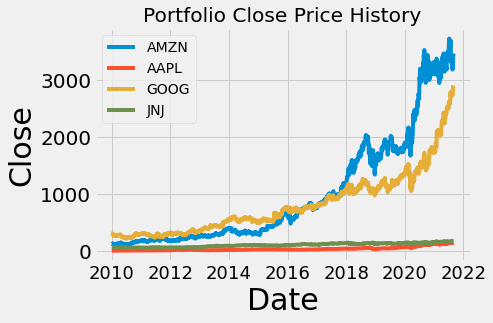

In [111]:
# Visually show the stock / portfolio

title = 'Portfolio Close Price History'

# Get the stocks
my_stocks = df6

# Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xticks (fontsize=18)
plt.yticks (fontsize=20)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Close', fontsize=30)
plt.legend(my_stocks.columns.values, loc = 'upper left')

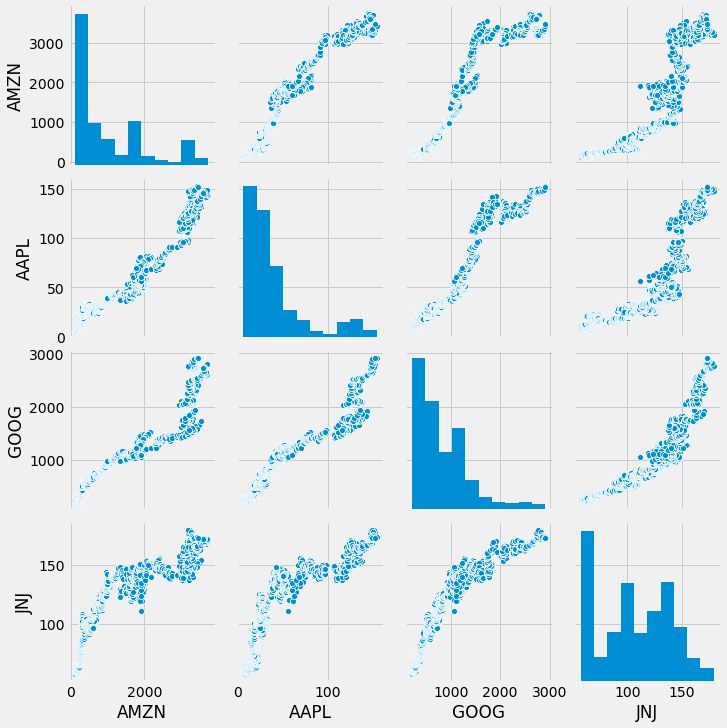

In [112]:
# Visualize correlation between these stocks

Recent = my_stocks

sns.pairplot(Recent[1:])

<u> Observation</u>: There is a clear high positive correlation between all these stocks

In [113]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [114]:
#Portfolio Optimization

# Calculate the expected returns and the annualised sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df6)
S = risk_models.sample_cov(df6)

In [115]:
# Optimize for max sharpe ratio

ef=EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AMZN', 0.45931), ('AAPL', 0.52723), ('GOOG', 0.01345), ('JNJ', 0.0)])
Expected annual return: 30.6%
Annual volatility: 25.2%
Sharpe Ratio: 1.13


(0.30575506012071463, 0.2518355170296541, 1.1346892745357535)

In [116]:
# Get the discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from cvxopt import solvers, matrix

latest_prices = get_latest_prices(df6)
weights = cleaned_weights
da=DiscreteAllocation(weights, latest_prices, total_portfolio_value = 100000) #1Lac is the overall portfolio allocation

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AMZN': 13, 'AAPL': 342, 'GOOG': 1}
Funds remaining: $44.63


## <u>Conclusion<u>

After running the optimization algorithm, we understand that if $1 Lac needs to be allocated on the 4 stocks in the investor's portfolio (as of 31st Aug 2021 close of business day), this would be allocated as follows:

    1. Amazon: 13 stocks
    2. Apple Inc Ltd: 342 stocks
    3. Google: 1 stock
    4. Johnson and Johnson: 0 stocks

There would be $44.63 still remaining with the investor after purchasing the above stocks
    
We can see that out of 12 stocks from the original list, only 3 stocks bring the best results to the investor. Hence, a concentrated portfolio is recommended for superior returns and low risk